<a href="https://colab.research.google.com/github/SainavyaGadde/DataScienceFinalProject/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Autonomous Household Energy Consumption Pattern Model Using Machine Learning Algorithms**

## **Introduction**
With the increasing emphasis on energy efficiency and environmental sustainability, managing household energy consumption has become a critical focus area. Rising energy costs and growing environmental concerns underscore the importance of optimizing energy use in smart homes.

This project aims to address this challenge by leveraging machine learning algorithms to develop an **Autonomous Household Energy Consumption Pattern Model**. By analyzing historical energy consumption data, the model will predict future usage patterns, enabling homeowners to make informed decisions about appliance use. This initiative not only promotes cost savings but also supports sustainability efforts, paving the way for more energy-efficient smart homes.

---

## **Project Objectives**
This project is guided by the following objectives:
1. **Analyze** the effectiveness of machine learning algorithms in predicting household energy consumption patterns.  
2. **Develop** an autonomous model using LSTM, GRU, and RNN algorithms to identify energy usage trends.  
3. **Train and Test** the model using the Kaggle dataset on household energy consumption.  
4. **Evaluate** the model's performance to identify the algorithm that provides the most accurate predictions.

---

## **Research Questions**
The project seeks to answer the following key questions:
1. How can machine learning algorithms be used to develop an autonomous model for predicting household energy consumption patterns?  
2. Which machine learning algorithm—LSTM, GRU, or RNN—provides the most accurate predictions for household energy consumption?

---

## **Dataset Overview**
The dataset used for this project is the **Household Power Consumption Dataset**, available on [Kaggle](https://www.kaggle.com/datasets/imtkaggleteam/household-power-consumption/data). Key details include:
- **Source**: Real-world household energy consumption data.  
- **Features**: Includes attributes such as `Global_active_power`, `Voltage`, and `Sub_metering` values that represent various aspects of energy usage.  
- **Timeframe**: Covers several years of data, providing a rich source for training machine learning models.  
- **Goal**: Utilize this data to predict future energy consumption patterns.

---

## **Models and Approach**
To achieve the project goals, the following machine learning models will be implemented:
1. **Recurrent Neural Network (RNN)**:  
   A foundational sequential model that learns time-dependent patterns.  

2. **Long Short-Term Memory (LSTM)**:  
   A powerful model capable of capturing long-term dependencies in time-series data using advanced gating mechanisms.

3. **Gated Recurrent Unit (GRU)**:  
   A simplified alternative to LSTM, known for its computational efficiency and ability to handle sequential data effectively.

The models will be trained and tested on the dataset under consistent hyperparameter configurations to ensure a fair comparison.

---

## **Workflow Overview**
1. **Data Preprocessing**:  
   Clean and preprocess the dataset, handling missing values and normalizing features.  

2. **Feature Engineering**:  
   Extract relevant time-series features, such as lag values and rolling statistics, to enhance model performance.  

3. **Model Development**:  
   Implement RNN, LSTM, and GRU architectures tailored for time-series forecasting.  

4. **Training and Evaluation**:  
   Train each model using predefined hyperparameters and evaluate their accuracy in predicting energy usage patterns.

5. **Comparison and Analysis**:  
   Compare the models to determine the most suitable algorithm for household energy consumption forecasting.

---

## **Significance of the Project**
This project not only contributes to the field of smart home technologies but also provides a framework for building energy-efficient solutions. By integrating IoT-based systems with machine learning models, homeowners can monitor and optimize their energy usage effectively, reducing costs and supporting a sustainable future.


In [ ]:
import pandas as pd
import numpy as np


import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from math import sqrt



import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

In [ ]:
#save the csv file in google drive location
file_name = '/content/sample_data/household_power_consumption.csv'

# Load the dataset into a Pandas DataFrame.
df = pd.read_csv(file_name, na_values = ['nan','?'])

In [ ]:
# check the sample
df.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
276793,26/6/2007,22:37:00,3.026,0.00,239.23,12.6,2.0,1.0,17.0
197355,2/5/2007,18:39:00,0.346,0.20,233.69,1.8,0.0,0.0,0.0
316774,24/7/2007,16:58:00,0.226,0.11,235.66,1.0,0.0,0.0,0.0
86643,14/2/2007,21:27:00,3.016,0.19,233.21,12.8,1.0,0.0,17.0


In [ ]:
# check size of data
df.shape

(336413, 9)

In [ ]:
# check data types
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [ ]:
# check na
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,3927
Global_reactive_power,3928
Voltage,3928
Global_intensity,3928
Sub_metering_1,3928
Sub_metering_2,3928
Sub_metering_3,3928


In [ ]:
# percentage of na
df.isna().sum()/df.shape[0]

,0
Date,0.000000
Time,0.000000
Global_active_power,0.011673
Global_reactive_power,0.011676
Voltage,0.011676
Global_intensity,0.011676
Sub_metering_1,0.011676
Sub_metering_2,0.011676
Sub_metering_3,0.011676


In [ ]:
# check the na values
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
327785,1/8/2007,8:29:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327786,1/8/2007,8:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327787,1/8/2007,8:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327788,1/8/2007,8:32:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# drop all nans
df.dropna(inplace=True)

In [ ]:
# check if there are other nas
df.isna().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,False


In [ ]:
# check data infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332485 entries, 0 to 336411
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   332485 non-null  object 
 1   Time                   332485 non-null  object 
 2   Global_active_power    332485 non-null  float64
 3   Global_reactive_power  332485 non-null  float64
 4   Voltage                332485 non-null  float64
 5   Global_intensity       332485 non-null  float64
 6   Sub_metering_1         332485 non-null  float64
 7   Sub_metering_2         332485 non-null  float64
 8   Sub_metering_3         332485 non-null  float64
dtypes: float64(7), object(2)
memory usage: 25.4+ MB


In [ ]:
# check data summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,332485.0,1.134385,1.179384,0.082,0.284,0.504,1.576,10.670
Global_reactive_power,332485.0,0.124051,0.111484,0.000,0.000,0.106,0.194,1.148
Voltage,332485.0,239.034203,3.733368,223.490,236.300,239.410,241.730,251.700
Global_intensity,332485.0,4.852896,4.979608,0.400,1.200,2.400,6.600,46.400
Sub_metering_1,332485.0,1.256072,6.525784,0.000,0.000,0.000,0.000,78.000
Sub_metering_2,332485.0,1.606000,6.531113,0.000,0.000,0.000,1.000,78.000
Sub_metering_3,332485.0,5.608418,8.100509,0.000,0.000,0.000,17.000,20.000


### **Data Information Observations**

The dataset contains information on household energy consumption, with a total of **1,048,575 records** and **9 columns**. Below are the key observations based on the dataset overview and summary statistics:

#### **General Information**
- **Total Rows**: 1,048,575
- **Total Columns**: 9
- **Memory Usage**: Approximately 72.0 MB
- **Column Types**:
  - **Numerical**: 7 columns (`float64`)
  - **Categorical (Object)**: 2 columns (`Date`, `Time`)

The table below summarizes the attributes information available in the dataset

| **Attribute**        | **Description**                                                                                                                       | **Type**            |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------|---------------------|
| `Date`               | Date in format `dd/mm/yyyy`.                                                                                                         | String / Date       |
| `time`               | Time in format `hh:mm:ss`.                                                                                                           | String / Time       |
| `globalactivepower`  | Household global minute-averaged active power (in kilowatt).                                                                         | Numerical (float)   |
| `globalreactivepower`| Household global minute-averaged reactive power (in kilowatt).                                                                       | Numerical (float)   |
| `voltage`            | Minute-averaged voltage (in volt).                                                                                                   | Numerical (float)   |
| `global_intensity`   | Household global minute-averaged current intensity (in ampere).                                                                      | Numerical (float)   |
| `submetering1`       | Energy sub-metering No. 1 (in watt-hour of active energy). Corresponds to the **kitchen**, mainly a dishwasher, oven, and microwave. | Numerical (float)   |
| `submetering2`       | Energy sub-metering No. 2 (in watt-hour of active energy). Corresponds to the **laundry room**, e.g., washing machine, fridge, light. | Numerical (float)   |
| `submetering3`       | Energy sub-metering No. 3 (in watt-hour of active energy). Corresponds to **electric water-heater** and **air-conditioner**.         | Numerical (float)   |

#### **Missing Data**
- Approximately **0.3881%** of the rows in the numerical columns have missing values.
- The columns affected by missing values include:
  - `Global_active_power`
  - `Global_reactive_power`
  - `Voltage`
  - `Global_intensity`
  - `Sub_metering_1`
  - `Sub_metering_2`
  - `Sub_metering_3`

#### **Summary Statistics of Numerical Columns**

1. **Energy Consumption Distribution**:
   - The average household global active power (`Global_active_power`) is **1.108 kW**, with a maximum value of **10.67 kW**.
   - Reactive power (`Global_reactive_power`) is relatively low, averaging **0.118 kW**.
2. **Voltage Stability**:
   - Voltage values are relatively stable, with an average of **239.96 volts** and a standard deviation of **3.285 volts**.
3. **Energy Intensity**:
   - Household global intensity (`Global_intensity`) has a wide range, from **0.2 amperes** to a peak of **46.4 amperes**.
4. **Sub-metering Insights**:
   - Sub-metering values for different areas (kitchen, laundry room, and water heater/air-conditioner) indicate variations in energy usage across household zones, with sub-metering 3 having the highest average consumption (**5.934 watt-hour**).


The dataset provides a rich set of features for analyzing and predicting household energy consumption patterns. Addressing missing data and normalizing numerical features will be essential steps in the preprocessing phase to ensure model accuracy and reliability.

In [ ]:
# Convert Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S")

In [ ]:
# Drop the date and Time column since we can get them on column created
df.drop(columns=["Date", "Time"], inplace=True)

In [ ]:
# create some additional data
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayname"] = df["datetime"].dt.day_name()


In [ ]:
# for the purpose of analysis, create year-month column from datetime
df["year_month"] = df["datetime"].dt.strftime("%Y-%b")

In [ ]:
# check sample
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
111177,1.426,0.198,238.59,6.0,0.0,0.0,17.0,2007-03-03 22:21:00,3,2007,3,22,62,Saturday,2007-Mar
280418,0.330,0.134,238.83,1.6,0.0,0.0,0.0,2007-06-29 11:02:00,6,2007,29,11,180,Friday,2007-Jun
181339,1.216,0.000,241.54,5.0,0.0,0.0,18.0,2007-04-21 15:43:00,4,2007,21,15,111,Saturday,2007-Apr
229085,1.372,0.086,234.60,5.8,0.0,1.0,17.0,2007-05-24 19:29:00,5,2007,24,19,144,Thursday,2007-May


In [ ]:
# check the max between date ranges to obrserve when it starts and ends
df["datetime"].min(), df["datetime"].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2007-08-07 08:15:00'))

In [ ]:
data = df.copy()


data = data.sort_values(by="year_month").reset_index(drop=True)

In [ ]:
# data.sort_values(by='year_month')

In [ ]:
# data
def plot_monthly_data(meaned_data, title, color, col, subplot_position):
    plt.subplot(subplot_position)
    meaned_data.index = pd.to_datetime(meaned_data.index, format='%Y-%b')
    meaned_data_sorted = meaned_data.sort_index()
    meaned_data_sorted.index = meaned_data_sorted.index.strftime('%Y-%b')
    meaned_data_sorted.plot(kind='line', color=color, marker='o')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=range(len(meaned_data_sorted)), labels=meaned_data_sorted.index, rotation=45, fontsize=10)


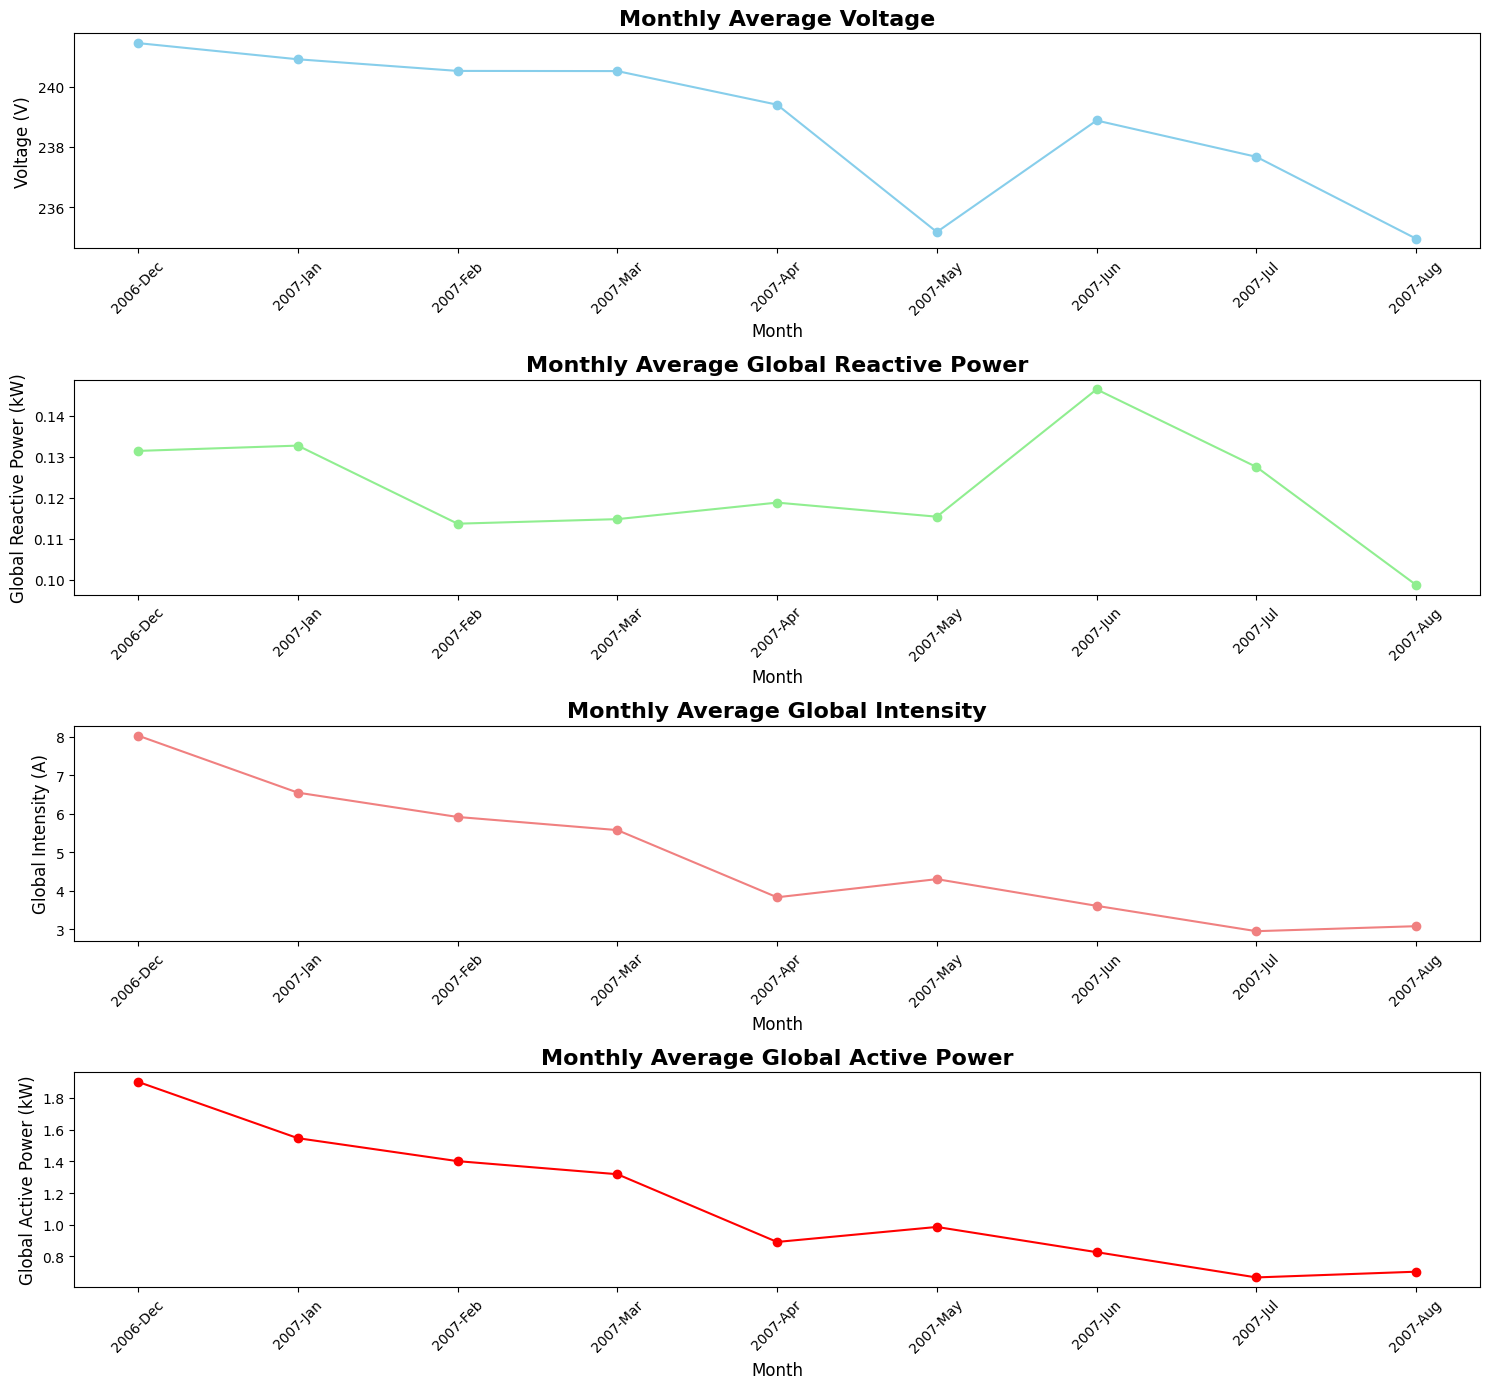

In [ ]:

# lets plot usage Information: VOltage, Active Power, Reactive Power, Intensity for monthly trends
plt.figure(figsize=(15, 14))
monthly_voltage = data.groupby('year_month')['Voltage'].mean()
plot_monthly_data(
    meaned_data=monthly_voltage,
    col='Voltage (V)',
    title='Monthly Average Voltage',
    color='skyblue',
    subplot_position=411
)

monthly_reactive_power = data.groupby('year_month')['Global_reactive_power'].mean()
plot_monthly_data(
    meaned_data=monthly_reactive_power,
    col='Global Reactive Power (kW)',
    title='Monthly Average Global Reactive Power',
    color='lightgreen',
    subplot_position=412
)



# Plot Global Intensity
monthly_intensity = data.groupby('year_month')['Global_intensity'].mean()
plot_monthly_data(
    meaned_data=monthly_intensity,
    col='Global Intensity (A)',
    title='Monthly Average Global Intensity',
    color='lightcoral',
    subplot_position=413
)

# Plot Global Active Power
monthly_active_power = data.groupby('year_month')['Global_active_power'].mean()
plot_monthly_data(
    meaned_data=monthly_active_power,
    col='Global Active Power (kW)',
    title='Monthly Average Global Active Power',
    color='red',
    subplot_position=414
)

plt.tight_layout()
plt.show()

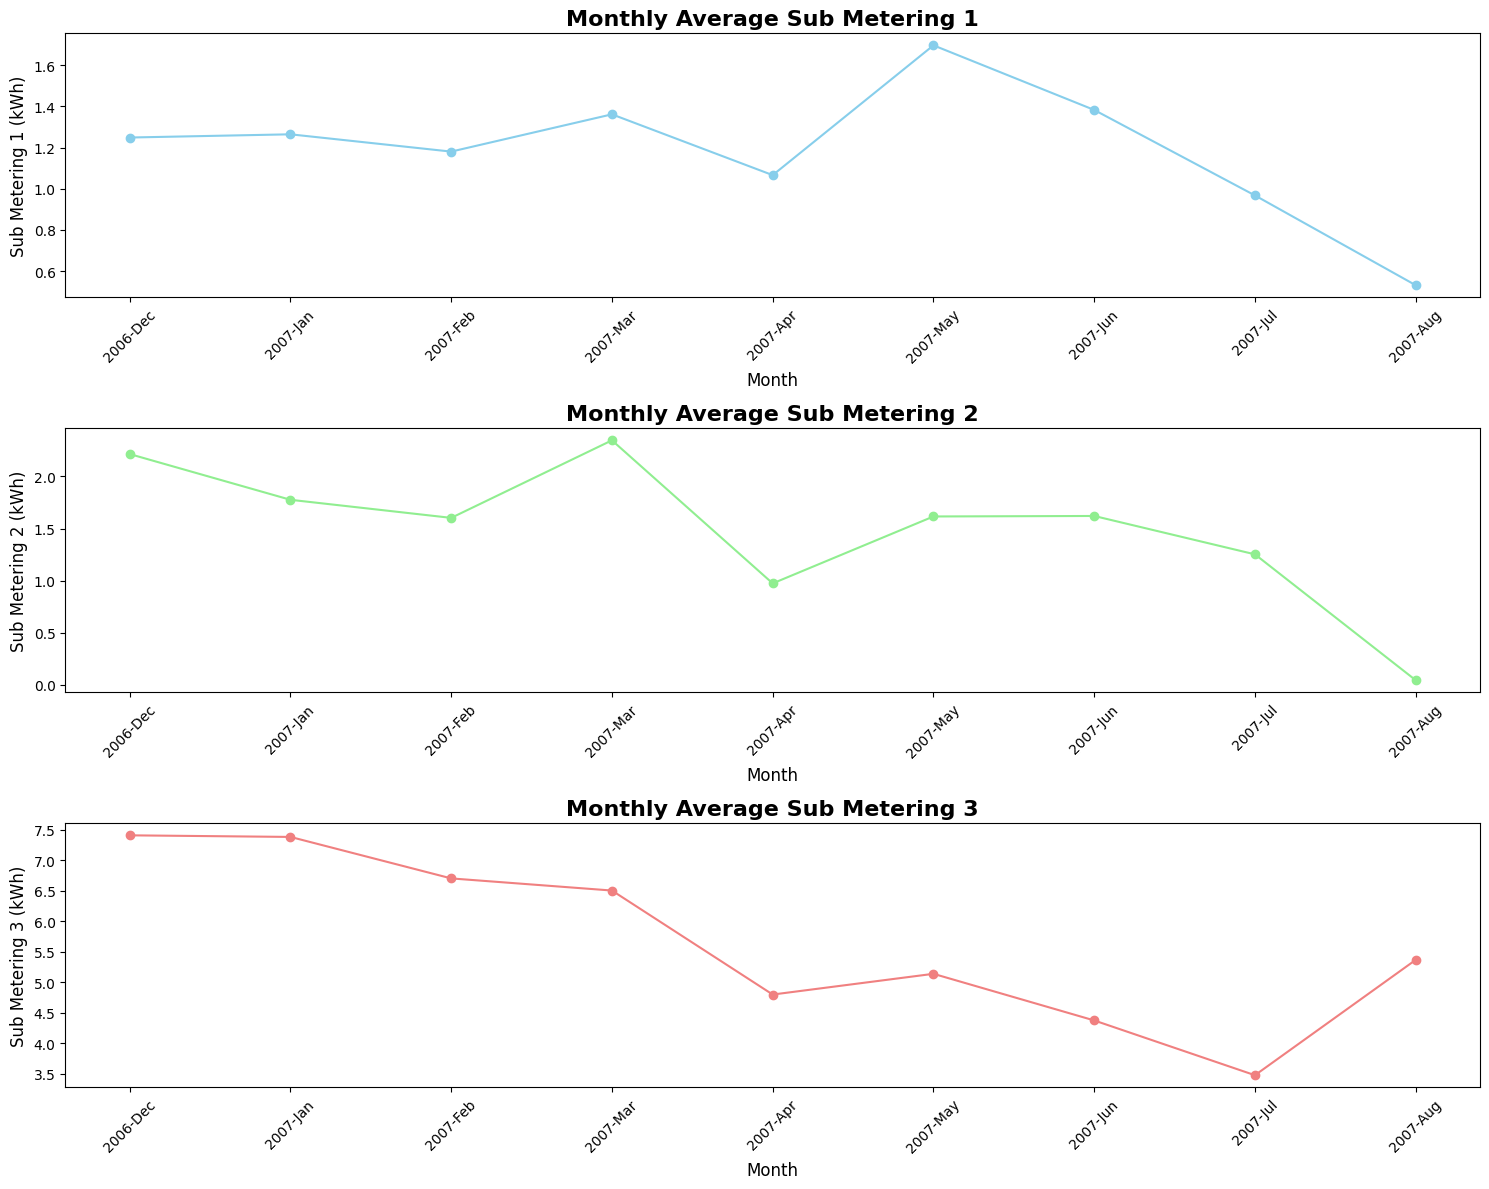

In [ ]:
# do the samle for SUB METERS
plt.figure(figsize=(15, 12))

# Sub_metering_1
Sub_metering_1 = data.groupby('year_month')['Sub_metering_1'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_1,
    col='Sub Metering 1 (kWh)',
    title='Monthly Average Sub Metering 1',
    color='skyblue',
    subplot_position=311
)

# Sub_metering_2
Sub_metering_2 = data.groupby('year_month')['Sub_metering_2'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_2,
    col='Sub Metering 2 (kWh)',
    title='Monthly Average Sub Metering 2',
    color='lightgreen',
    subplot_position=312
)

# Sub_metering_3
Sub_metering_3 = data.groupby('year_month')['Sub_metering_3'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_3,
    col='Sub Metering 3 (kWh)',
    title='Monthly Average Sub Metering 3',
    color='lightcoral',
    subplot_position=313
)
plt.tight_layout()
plt.show()





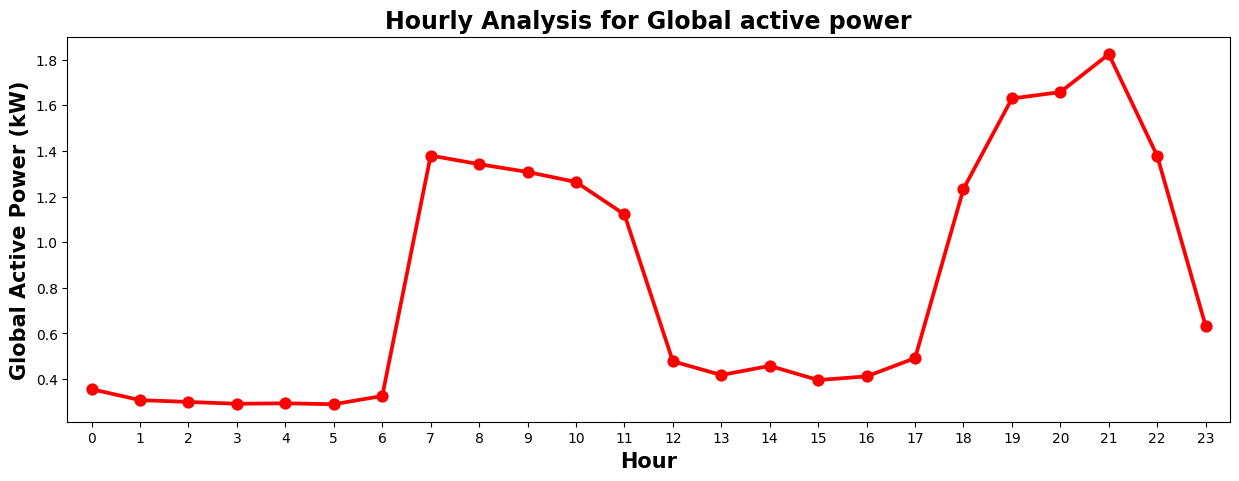

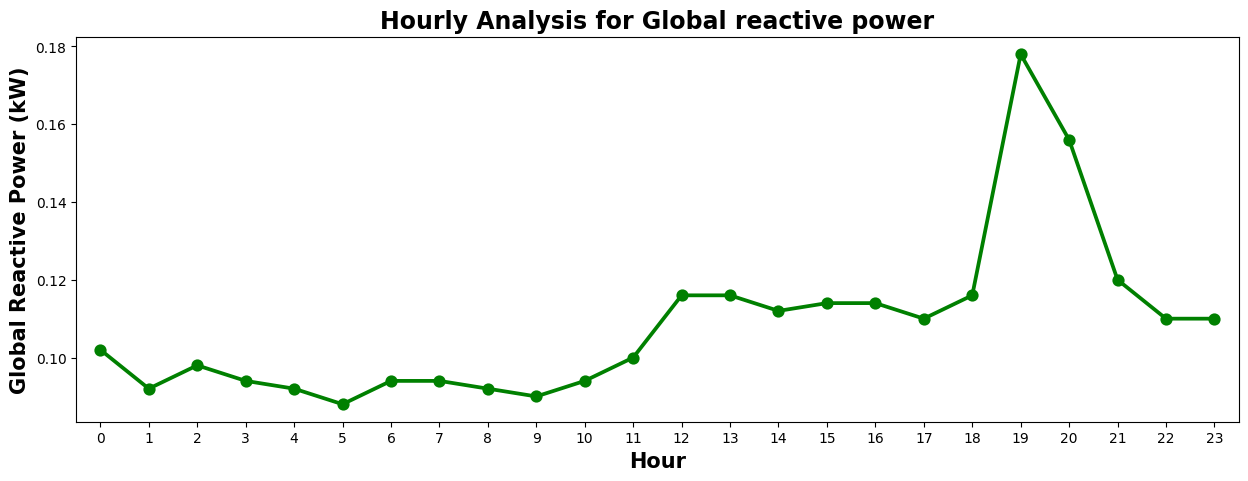

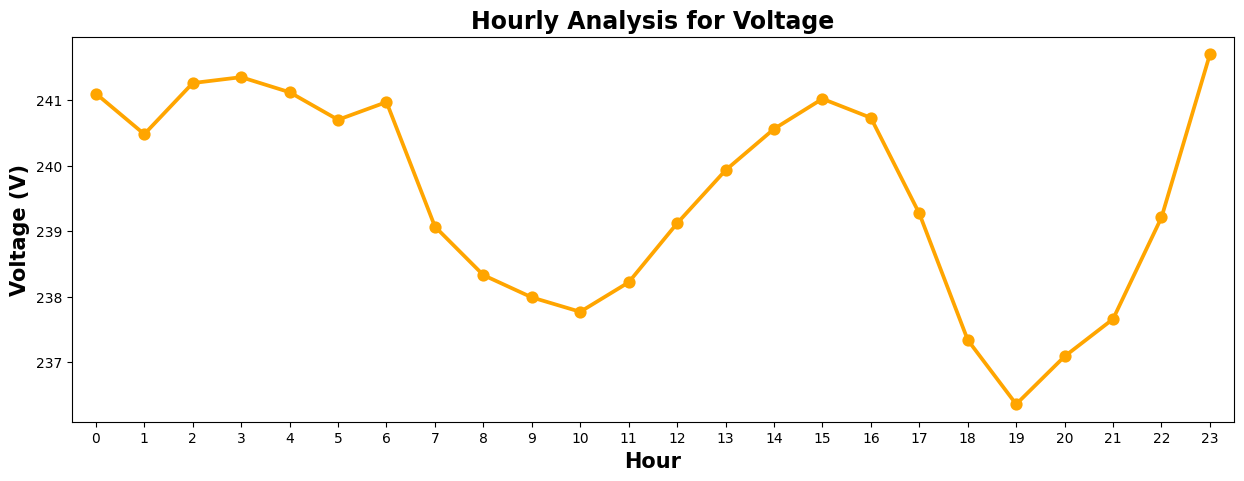

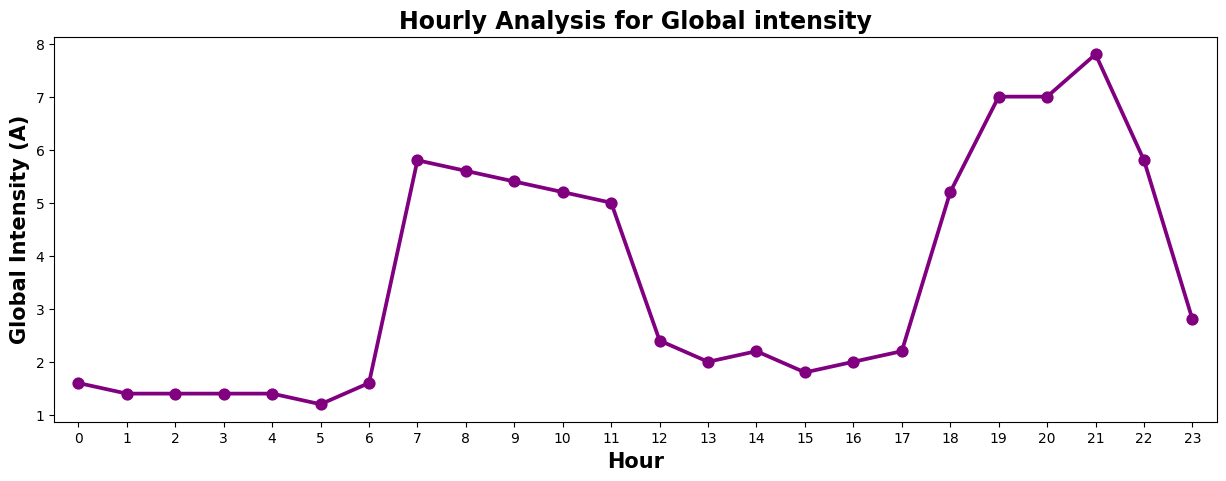

In [ ]:
# do hour analysis of the energies
colors = ['red', 'green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
y_labels = [
    'Global Active Power (kW)',
    'Global Reactive Power (kW)',
    'Voltage (V)',
    'Global Intensity (A)'
]

# create plots by medianed hour
for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=False)
    )
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )

    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


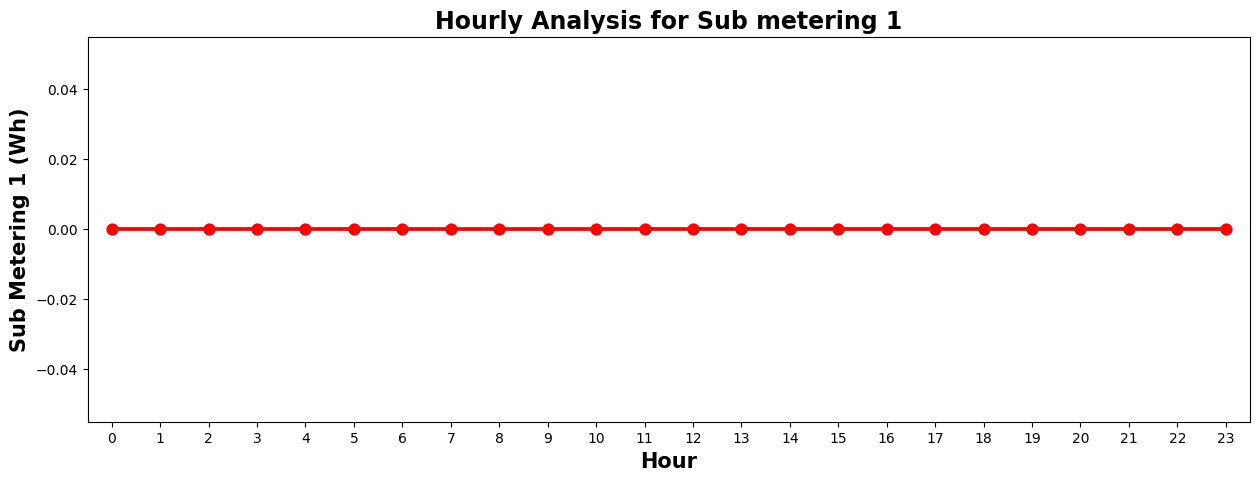

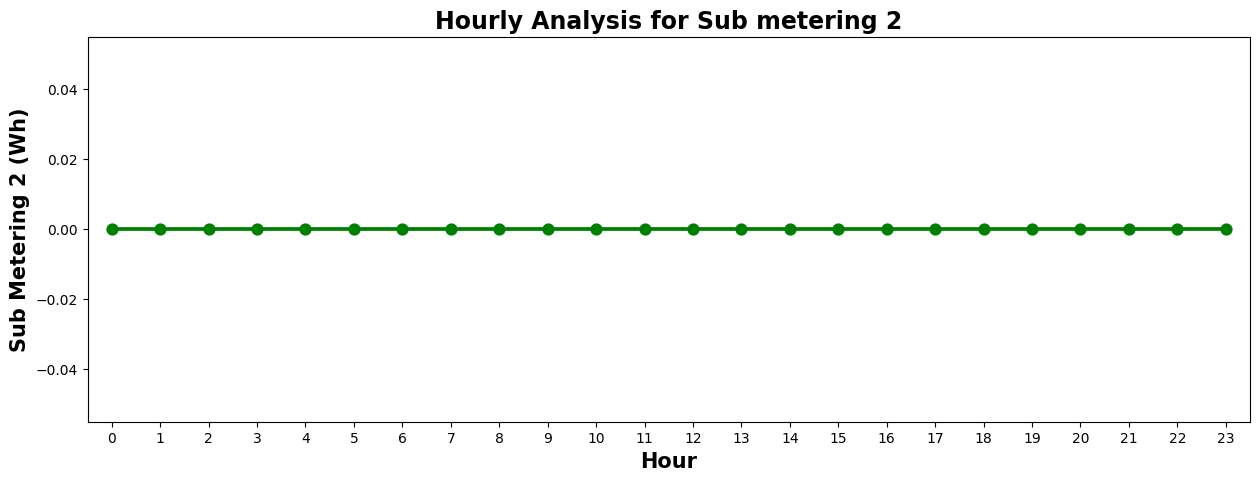

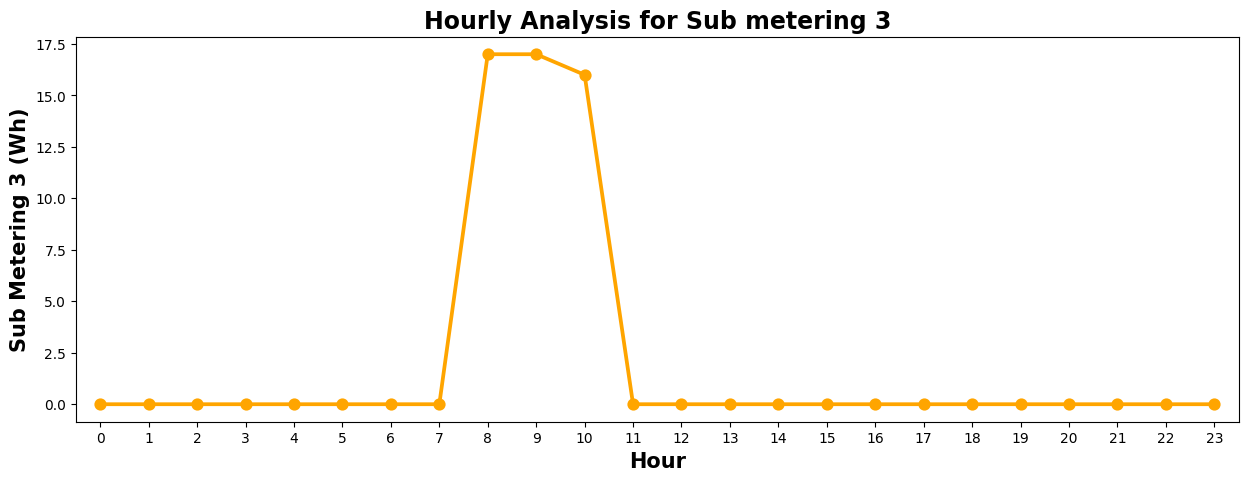

In [ ]:
# BY sub meters
# cols for analysis (Sub_metering_1, Sub_metering_2, Sub_metering_3)
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y_labels = [
    'Sub Metering 1 (Wh)',
    'Sub Metering 2 (Wh)',
    'Sub Metering 3 (Wh)'
]

for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=True)
    )

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )
    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

In [ ]:
# create the order for weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


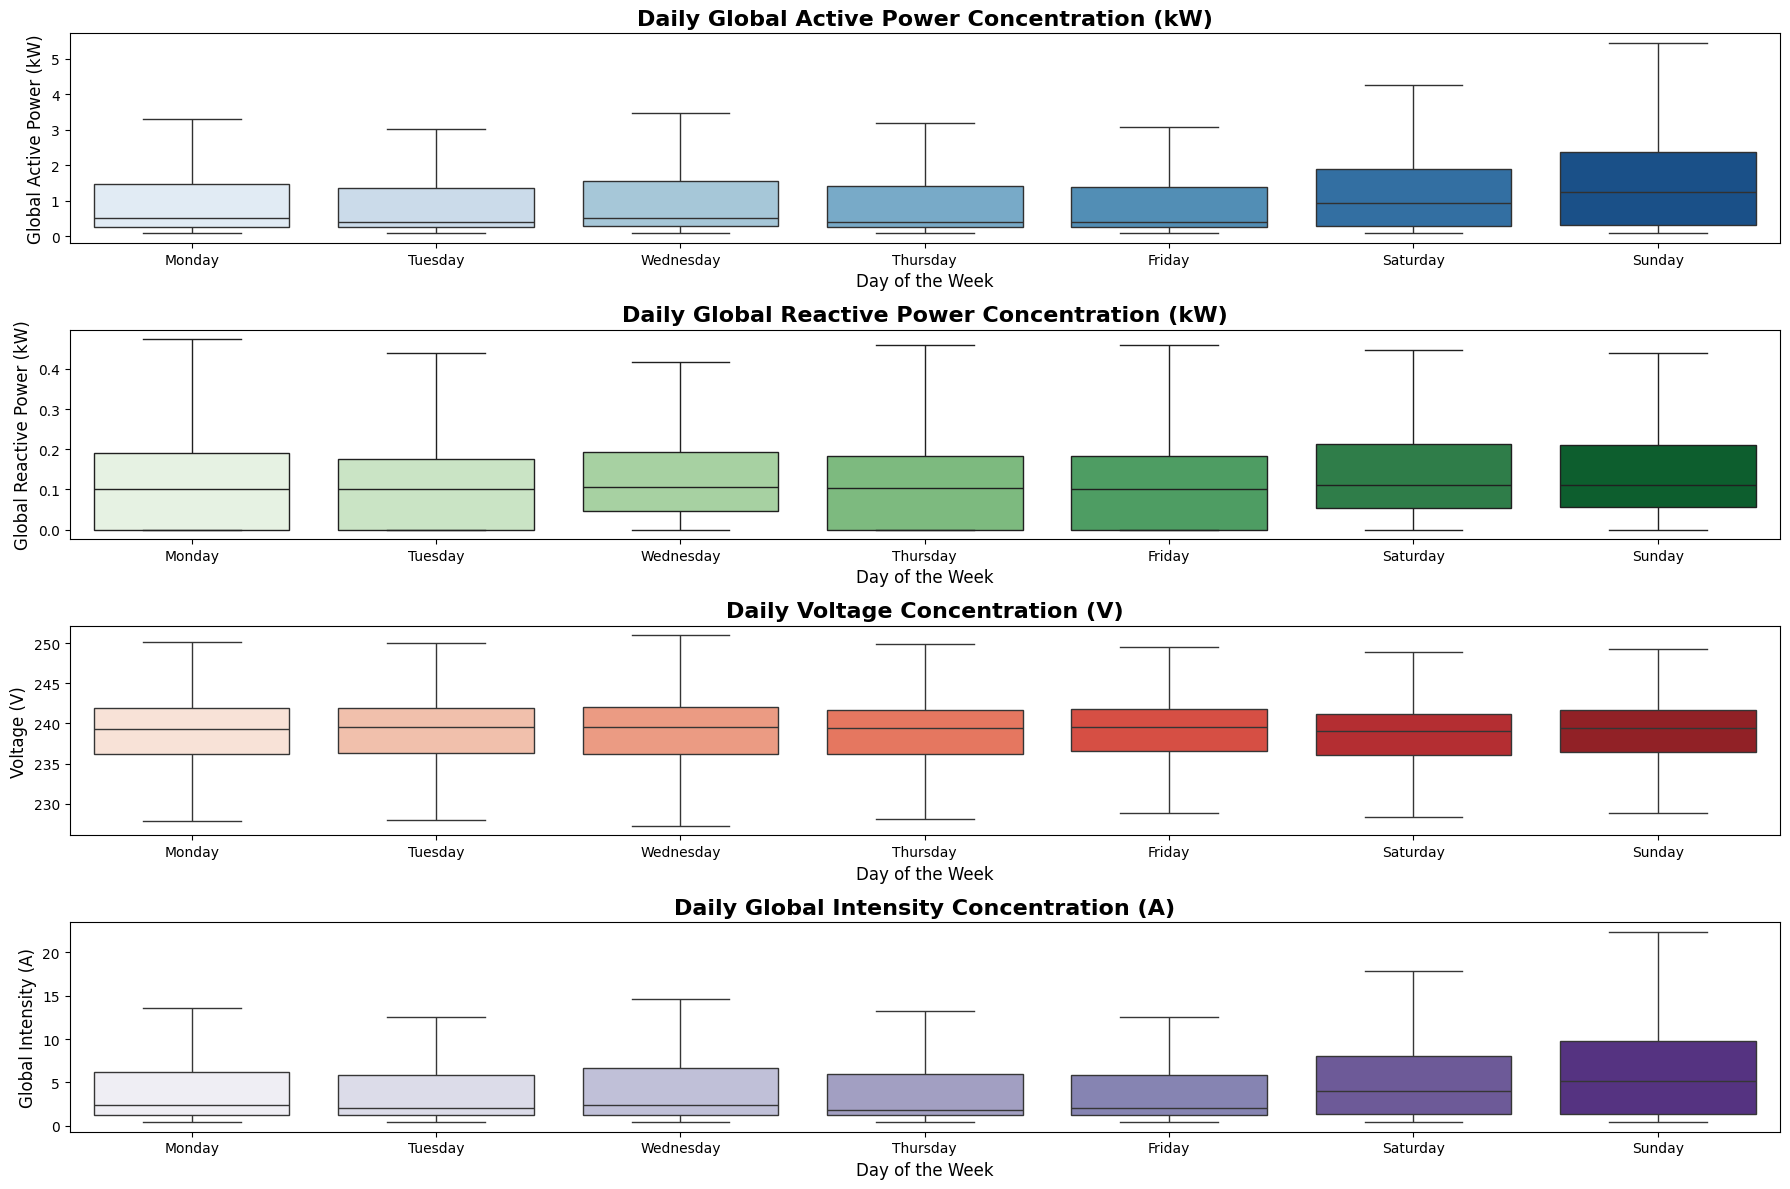

In [ ]:
plt.figure(figsize=(18, 12))

# Global Active Power plot
plt.subplot(4, 1, 1)
sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False, order=weekday_order)
plt.title('Daily Global Active Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Global Reactive Power plot
plt.subplot(4, 1, 2)
sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False, order=weekday_order)
plt.title('Daily Global Reactive Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Reactive Power (kW)', fontsize=12)

# Voltage plot
plt.subplot(4, 1, 3)
sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False, order=weekday_order)
plt.title('Daily Voltage Concentration (V)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)

# Global Intensity plot
plt.subplot(4, 1, 4)
sns.boxplot(x='dayname', y='Global_intensity', data=data, palette='Purples', showfliers=False, order=weekday_order)
plt.title('Daily Global Intensity Concentration (A)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Intensity (A)', fontsize=12)

plt.tight_layout()
plt.show()


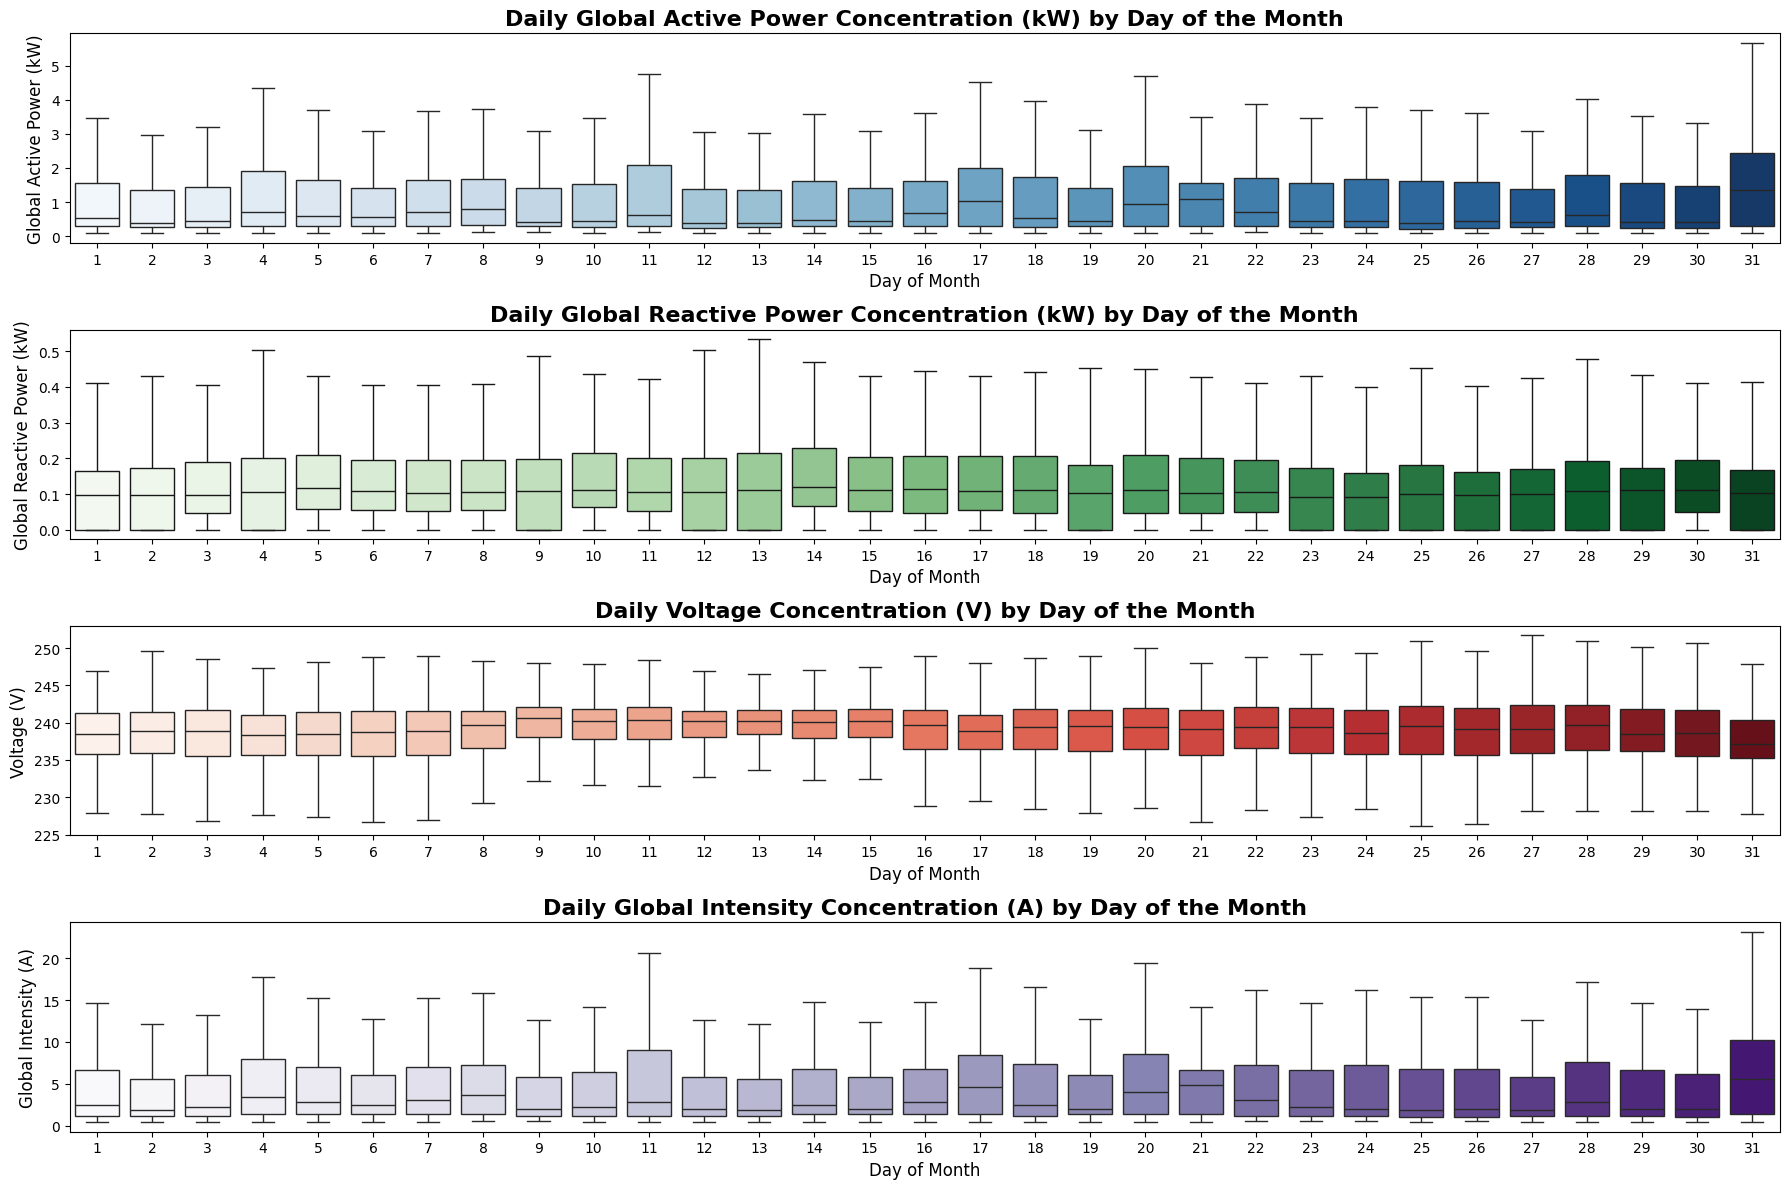

In [ ]:
# grouping bu date of month
def plot_boxplot_by_group(data, group_col, y_col, title, palette, ylabel):
    sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

# Boxplots for day of the month (day) - grouped by day of the month
plt.figure(figsize=(18, 12))
plt.subplot(4, 1, 1)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_active_power',
    title='Daily Global Active Power Concentration (kW) by Day of the Month',
    palette='Blues',
    ylabel='Global Active Power (kW)'
)
plt.subplot(4, 1, 2)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_reactive_power',
    title='Daily Global Reactive Power Concentration (kW) by Day of the Month',
    palette='Greens',
    ylabel='Global Reactive Power (kW)'
)
plt.subplot(4, 1, 3)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Voltage',
    title='Daily Voltage Concentration (V) by Day of the Month',
    palette='Reds',
    ylabel='Voltage (V)'
)
plt.subplot(4, 1, 4)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_intensity',
    title='Daily Global Intensity Concentration (A) by Day of the Month',
    palette='Purples',
    ylabel='Global Intensity (A)'
)

plt.tight_layout()
plt.show()

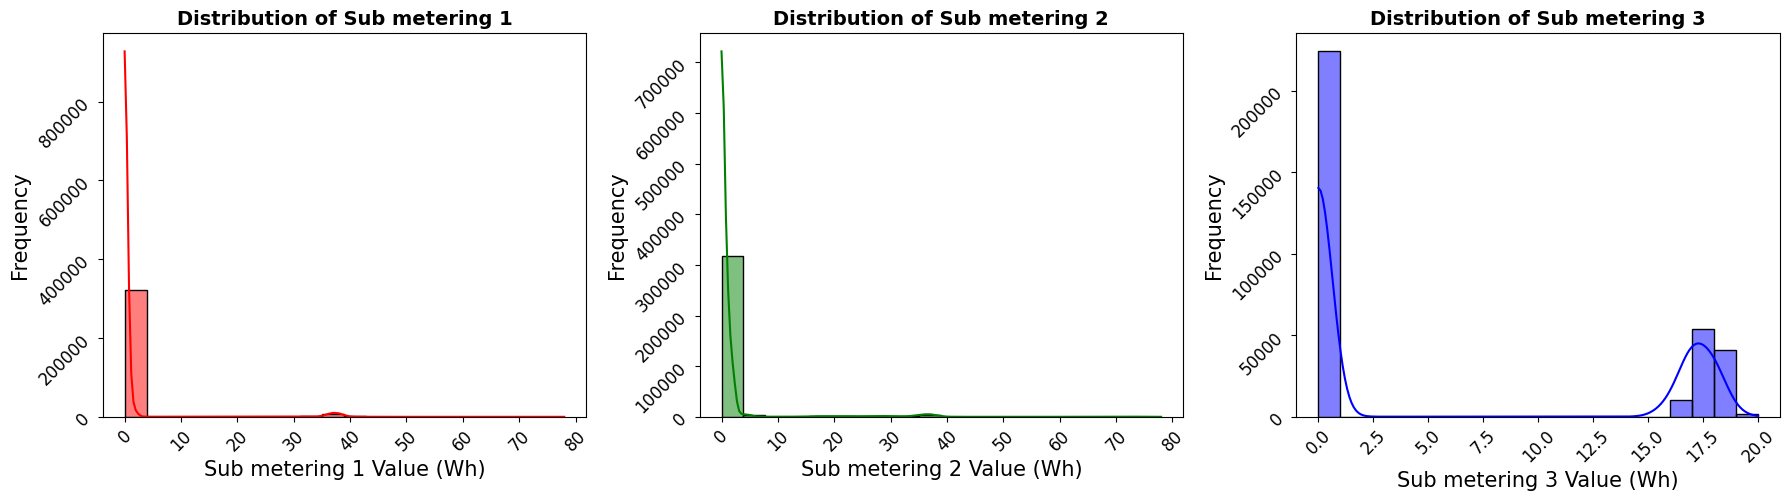

In [ ]:
# distribution of usages
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
colors = ['red', 'green', 'blue']
plt.figure(figsize=(18, 5))
# for each sub meters
for i, column in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.histplot(data[column], kde=True, color=colors[i % len(colors)], bins=20)

    plt.title(f'Distribution of {column.replace("_", " ").capitalize()}', fontweight='bold', fontsize=14)
    plt.xlabel(f'{column.replace("_", " ").capitalize()} Value (Wh)', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12, rotation=45)
plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

#### Observation
- The histograms shows that;
1. Sub-metering 1 shows a right-skewed distribution with a majority of values concentrated around 0 Wh and a few higher values.
2. Sub-metering 2 has a similar pattern, but with a slightly wider spread
3. Sub-metering 3 exhibits a bimodal distribution with distinct peaks around 10 Wh and 20 Wh, suggesting two different usage patterns.

- In general, the data suggests varying usage patterns across the three sub-meters, with Sub-metering 3 showing the most diverse behavior.

In [ ]:
# select numerical columns
# We exlude the TIME BASED VARIABLES
df_num = df.select_dtypes(include=["float", "int"]).drop(columns=["year", "dayofyear","month"])
df_num.head(3)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,16,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,16,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,16,17


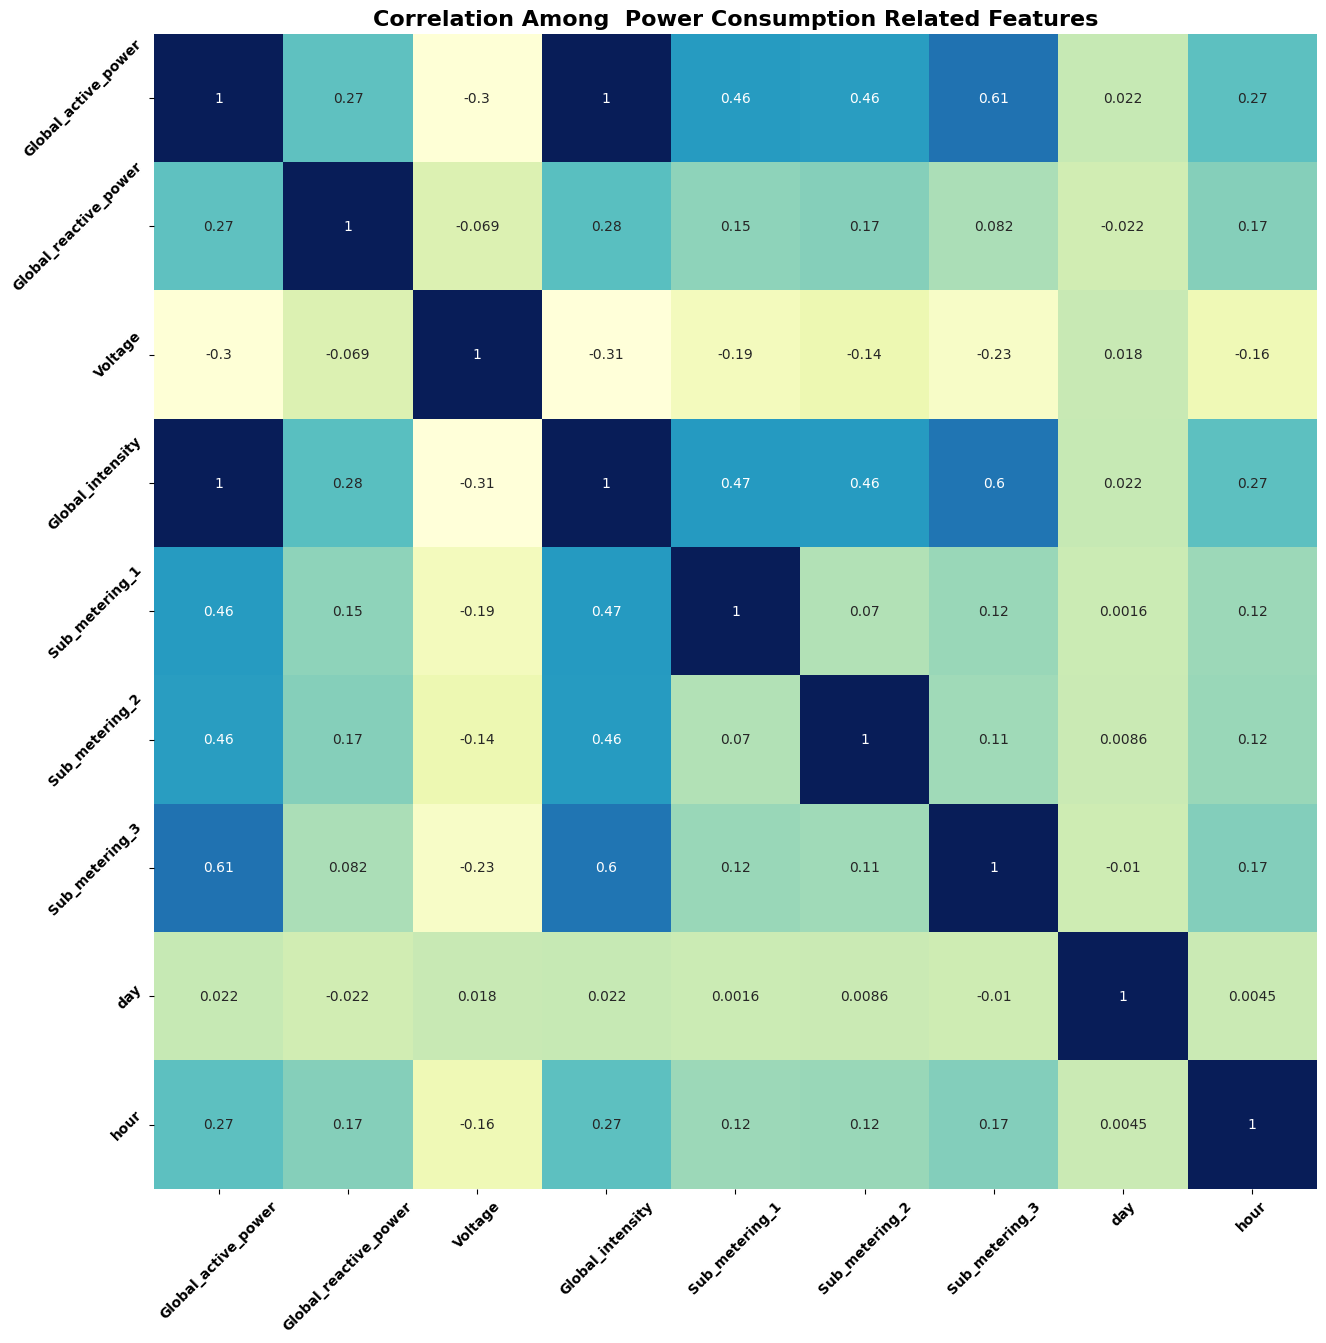

In [ ]:
# plot corrrelation analysis
plt.figure(figsize=(15,15))
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Correlation Among  Power Consumption Related Features", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontweight='bold')
plt.yticks(rotation=45, fontweight='bold')
plt.show()

In [ ]:
corr

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,day,hour
Global_active_power,1.000000,0.266795,-0.296467,0.998935,0.464617,0.457794,0.610501,0.021979,0.272773
Global_reactive_power,0.266795,1.000000,-0.069114,0.282980,0.149528,0.172102,0.082297,-0.021672,0.169654
Voltage,-0.296467,-0.069114,1.000000,-0.307626,-0.191331,-0.144986,-0.234186,0.017780,-0.164322
Global_intensity,0.998935,0.282980,-0.307626,1.000000,0.470142,0.463761,0.600215,0.021636,0.274160
Sub_metering_1,0.464617,0.149528,-0.191331,0.470142,1.000000,0.069847,0.123435,0.001582,0.118493
Sub_metering_2,0.457794,0.172102,-0.144986,0.463761,0.069847,1.000000,0.111015,0.008568,0.124429
Sub_metering_3,0.610501,0.082297,-0.234186,0.600215,0.123435,0.111015,1.000000,-0.010175,0.173473
day,0.021979,-0.021672,0.017780,0.021636,0.001582,0.008568,-0.010175,1.000000,0.004516
hour,0.272773,0.169654,-0.164322,0.274160,0.118493,0.124429,0.173473,0.004516,1.000000


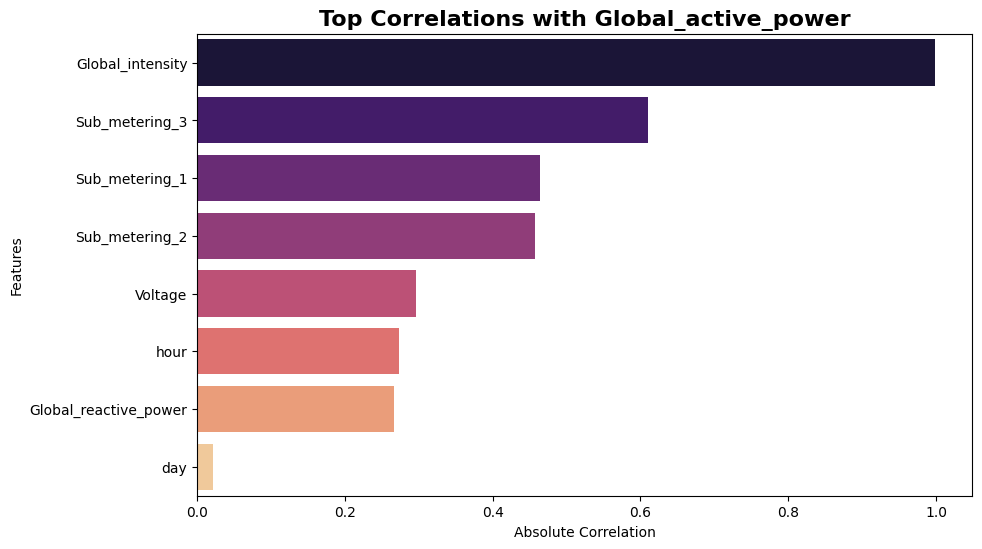

In [ ]:
# get correlation with Global_active_power

# extract the Global_active_power column and sort the correlations
Global_active_power = corr['Global_active_power'].abs().sort_values(ascending=False)
# remove the first since is stroke itself
top_corr = Global_active_power.index[1:]

# a bar chart show the results
plt.figure(figsize=(10, 6))
sns.barplot(x=Global_active_power[top_corr], y=top_corr, palette='magma')
plt.title('Top Correlations with Global_active_power', fontsize=16, fontweight='bold')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')

plt.show()

### **Machine Learning Approach**

The approach for machine learning will involve training and evaluating models such as **LSTM**, **GRU**, and **RNN**, which are well-suited for time-series data due to their ability to capture temporal dependencies. The following are some of the models to be used;

    - **LSTM (Long Short-Term Memory)**: Effective for capturing long-term dependencies.
    - **GRU (Gated Recurrent Unit)**: Computationally efficient and capable of learning temporal patterns.
    - **RNN (Recurrent Neural Network)**: for deeper understanding of sequential.
    - **MLP model**: To be used as a baseline for comparison with recurrent one
    - **Hybrid Model**: A combination of RNN, GRU and LSTM to observe how they perfoms when combined.


#### **Performance Metrics**
To evaluate the models' performance, we will track their **epoch-wise performance** using the following metrics:

1. **Mean Squared Error (MSE)**:
   - Measures the average squared difference between predicted and actual values.
   - A lower MSE indicates better model performance.
   - Formula:  
     \[$
     \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
     \$]

2. **Root Mean Squared Error (RMSE)**:
   - The square root of MSE, providing error in the same units as the target variable.
   - RMSE is more interpretable for practical applications as it penalizes larger errors more significantly.
   - Formula:  
     \[$
     \text{RMSE} = \sqrt{\text{MSE}}
     \$]


3. **Training Configuration**:
   - Use a train-validation split to monitor performance during training.
   - Track **MSE** and **RMSE** after each epoch to visualize learning progress and identify potential overfitting or underfitting.

The machine learning models will provide predictions for household energy consumption patterns, and their performance will be compared using **MSE** and **RMSE**. By visualizing these metrics over epochs, we aim to ensure robust model training and select the best-performing algorithm for deployment in energy-efficient smart home systems.

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,12,2006,16,17,350,Saturday,2006-Dec
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,12,2006,16,17,350,Saturday,2006-Dec
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,12,2006,16,17,350,Saturday,2006-Dec
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,12,2006,16,17,350,Saturday,2006-Dec
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,12,2006,16,17,350,Saturday,2006-Dec


In [ ]:
import random
def set_reproducibility(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    print(f"Reproducibility set with seed {seed}")

set_reproducibility(seed=42)


Reproducibility set with seed 42


#### Features breakdown:

For this project, the goal is to predict household energy consumption, focusing on the **`Global_active_power`** column as the target variable. This column represents the total active power consumed by the household, which is a key metric for understanding overall energy usage. It is the power directly consumed by individuals without considering any transmission loss [reactive power].


#### 1. ** ` Why use Global_active_power as our target`**
- **`Global_active_power`** is used becuase it represents the total active power directly consumed by the household. This is the main measure of energy consumption in the dataset, and predicting it will give insights into the total power usage, which is the primary goal of this analysis.
- Since energy consumption is inherently **time-dependent**, past consumption of active power (such as in `Global_active_power`) is highly predictive of future consumption. Using **`Global_active_power`** as the target allows us to model these temporal dependencies and forecast energy usage over time.

#### 2. **Why not Other features as Targget or Independents?**
   - **`Global_reactive_power`**:  This is a reactive power in the electrical system but is **not directly related to energy consumption** in the household. It captures the power that doesn't perform any useful work but affects the system's behavior. It is not used as the target because it’s less directly tied to active energy consumption.

   - **`Voltage`**: Measures the electrical potential in the system, but like `Global_reactive_power`, it is more about system conditions rather than direct household energy consumption.
   - **`Global_intensity`**:  Represents the current intensity in the system. While it’s related to the overall power consumed, it is **highly correlated with `Global_active_power`** and doesn’t provide new information for predicting energy consumption specifically.

   - **`Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3`**:  These features capture energy consumption in different parts of the house (e.g., kitchen, laundry). They are **dependent on each other** and not suitable for being used as separate targets in this analysis. By focusing on **`Global_active_power`**, we avoid redundancy and focus on the overall energy consumption pattern.


Through selecting **`Global_active_power`** as the target variable, we ensure that the model learns the time-series patterns of energy consumption over time, while using other features (N lags) to help capture periodic trends.

---



In [ ]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

In [ ]:
# setting datetime as index
df = df.set_index("datetime")
df.sample(1)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,month,year,day,hour,dayofyear,dayname,year_month
datetime,,,,,,,,,,,,,,
2007-01-16 08:03:00,1.584,0.22,239.0,6.6,2.0,0.0,18.0,1,2007,16,8,16,Tuesday,2007-Jan


In [ ]:
final_series = df['Global_active_power'].resample('3H').sum()
final_series

,Global_active_power
datetime,
2006-12-16 15:00:00,152.024
2006-12-16 18:00:00,618.060
2006-12-16 21:00:00,439.092
2006-12-17 00:00:00,409.148
2006-12-17 03:00:00,352.482
...,...
2007-08-06 18:00:00,38.690
2007-08-06 21:00:00,121.190
2007-08-07 00:00:00,186.330


In [ ]:
# scale the data
#  Normalizing Features
scaler = MinMaxScaler(feature_range=(0, 1))
final_series_scaled = scaler.fit_transform(final_series.values.reshape(-1,1))
final_series_scaled.shape

(1870, 1)

In [ ]:
final_data = pd.DataFrame(final_series_scaled.flatten(), columns=["target"])
final_data.index = final_series.index

In [ ]:
# add some data as lags which will be used as features for predictors.
for lag_val in range(1,8):
    final_data[f'lag_{lag_val}'] = final_data['target'].shift(lag_val)

# drop nulls/ This is caused while creating lag features
final_data.dropna(inplace=True)

In [ ]:
# check the data
final_data.head()

,target,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
datetime,,,,,,,,
2006-12-17 12:00:00,0.357298,0.545089,0.303389,0.370245,0.429766,0.461219,0.649206,0.159685
2006-12-17 15:00:00,0.612476,0.357298,0.545089,0.303389,0.370245,0.429766,0.461219,0.649206
2006-12-17 18:00:00,0.628156,0.612476,0.357298,0.545089,0.303389,0.370245,0.429766,0.461219
2006-12-17 21:00:00,0.314898,0.628156,0.612476,0.357298,0.545089,0.303389,0.370245,0.429766
2006-12-18 00:00:00,0.055091,0.314898,0.628156,0.612476,0.357298,0.545089,0.303389,0.370245


In [ ]:
# create train/target features as tensors
X, y = torch.tensor(final_data.drop("target", axis=1).values, dtype=torch.float32), torch.tensor(final_data.target, dtype=torch.float32)


X.shape, y.shape

(torch.Size([1863, 7]), torch.Size([1863]))

In [ ]:
# --- Train-Test Split ---
# split into training and testing sets (based on time, the last 10% is for validation)
train_size = int(len(X) * 0.90)  # 90% for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# check size
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: torch.Size([1676, 7]), y_train shape: torch.Size([1676])
X_test shape: torch.Size([187, 7]), y_test shape: torch.Size([187])


In [ ]:
# we need to convert the data into 3D in order to train LSTM/RNNS i.e [samples, timesteps, features].
# we we did not do any timesteps hence it is 1
Xtrain = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
Xtest = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(Xtrain.shape, y_train.shape, Xtest.shape, y_test.shape)

torch.Size([1676, 1, 7]) torch.Size([1676]) torch.Size([187, 1, 7]) torch.Size([187])


### Helper functions

In [ ]:
LEARNING_RATE = 0.001

# define paramss
TIME_STEPS = 1
BATCH_SIZE = 32
EPOCHS = 50
HIDDEN_SIZE = 128
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
"""
Helper functions which will be used for training, analysis and also plotting results achieved
"""

def train_and_evaluate(
    model, X_train, y_train, X_test, y_test, optimizer, criterion, epochs=10, batch_size=32, device=DEVICE, log=True
):
    model = model.to(device)
    hist = {"train_loss": [], "train_rmse": [], "val_loss": [], "val_rmse": []}

    def create_batches(X, y, batch_size):
        num_samples = X.shape[0]
        for i in range(0, num_samples, batch_size):
            yield X[i:i+batch_size], y[i:i+batch_size]

    for epoch in range(epochs):
        # Train loop
        model.train()
        train_loss = 0.0
        train_preds = []
        train_actual = []
        for X_batch, y_batch in create_batches(X_train, y_train, batch_size):
            X_batch, y_batch = torch.tensor(X_batch, dtype=torch.float32).to(device), torch.tensor(y_batch, dtype=torch.float32).to(device)

            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()

            # Store predictions and actual values for RMSE
            train_preds.append(outputs.cpu().detach())
            train_actual.append(y_batch.cpu().detach())

            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # Compute train RMSE
        train_preds = torch.cat(train_preds)
        train_actual = torch.cat(train_actual)
        train_rmse = rmse_score(train_actual.numpy(), train_preds.numpy())

        # Validation loop
        model.eval()
        val_loss = 0.0
        val_preds = []
        val_actual = []
        with torch.no_grad():
            for X_batch, y_batch in create_batches(X_test, y_test, batch_size):
                X_batch, y_batch = torch.tensor(X_batch, dtype=torch.float32).to(device), torch.tensor(y_batch, dtype=torch.float32).to(device)
                outputs = model(X_batch).squeeze()
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                # Store validation outputs and targets
                val_preds.append(outputs.cpu().detach())
                val_actual.append(y_batch.cpu().detach())

        val_loss /= len(X_test) / batch_size

        # Compute validation RMSE
        val_preds = torch.cat(val_preds)
        val_actual = torch.cat(val_actual)
        val_rmse = rmse_score(val_actual.numpy(), val_preds.numpy())

        # Store metrics
        hist['train_loss'].append(train_loss / (len(X_train) / batch_size))
        hist['train_rmse'].append(train_rmse)
        hist['val_loss'].append(val_loss)
        hist['val_rmse'].append(val_rmse)

        # Print progress
        if log:
            print(f"Epoch [{epoch + 1}/{epochs}], "
                  f"Train Loss: {train_loss / (len(X_train) / batch_size):.4f}, "
                  f"Train RMSE: {train_rmse:.4f}, "
                  f"Val Loss: {val_loss:.4f}, "
                  f"Val RMSE: {val_rmse:.4f}")

    if not log:
        print(f"Epoch [{epoch + 1}/{epochs}], "
              f"Train Loss: {train_loss / (len(X_train) / batch_size):.4f}, "
              f"Train RMSE: {train_rmse:.4f}, "
              f"Val Loss: {val_loss:.4f}, "
              f"Val RMSE: {val_rmse:.4f}")
    return model, hist

def rmse_score(true, pred):
    return np.sqrt(((true - pred) ** 2).mean())




def training_history_curves_plot(history, model_name):
    metrics = ['loss', 'rmse']
    titles = ['Loss', 'RMSE']
    ylabels = ['Loss', 'RMSE']
    colors = "bgrcmyk"
    x = np.arange(1, len(history['train_loss']) + 1)

    fig, ax = plt.subplots(1, len(metrics), figsize=(20, 8))

    for i, metric in enumerate(metrics):
        train_metric = history[f'train_{metric}']
        val_metric = history[f'val_{metric}']

        ax[i].plot(x, train_metric, f'{colors[i]}o-', label=f'Training {titles[i]}', linewidth=2)
        ax[i].plot(x, val_metric, f'{colors[len(colors) - 1 - i]}o-', label=f'Validation {titles[i]}', linewidth=2)
        ax[i].set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax[i].set_ylabel(ylabels[i], fontsize=12, fontweight='bold')
        ax[i].set_title(f'Training and Validation {titles[i]}', fontsize=14, fontweight='bold')
        ax[i].legend(fontsize=12)

    plt.suptitle(f"Training and Validation Metrics Trends for Model {model_name}", fontweight='bold', fontsize=17, y=1.09)
    plt.tight_layout()
    plt.show()

# function to perfom prediction
def predict(model, xtest_tensor):
    model.eval()
    predictions = model(xtest_tensor).squeeze().cpu().detach().numpy()
    return predictions

def regression_metrics(y_true, y_pred, scaler_obj = scaler):
    # inverse transform for logarithmic predictions if needed
    y_true = scaler_obj.inverse_transform(y_true.reshape(-1,1)).flatten()
    y_pred = scaler_obj.inverse_transform(y_pred.reshape(-1,1)).flatten()

    metrics = {
        "R2 Score": r2_score(y_true, y_pred),
        "Mean Squared Error (MSE)": mean_squared_error(y_true, y_pred),
        "Root Mean Squared Error (RMSE)": mean_squared_error(y_true, y_pred) ** 0.5,
        "Mean Absolute Error (MAE)": mean_absolute_error(y_true, y_pred)
    }
    return metrics
def compare_predictions_with_ci(y_true, y_pred, model_name, ci_width=0.1, scaler_obj = scaler):
    # inverse transform for logarithmic predictions if needed
    y_true = scaler_obj.inverse_transform(y_true.reshape(-1,1)).flatten()
    y_pred = scaler_obj.inverse_transform(y_pred.reshape(-1,1)).flatten()

    # calculate residuals
    residuals = y_true - y_pred

    # find confidence intervals
    ci_lower = y_pred - ci_width * y_pred
    ci_upper = y_pred + ci_width * y_pred

    # create a df for comparison
    compare_data = pd.DataFrame({
        'Actual': y_true,
        'Predicted': y_pred,
        'Residual': residuals,
        'CI_Lower': ci_lower,
        'CI_Upper': ci_upper
    }).reset_index(drop=True)

    plt.figure(figsize=(20, 10))

    # plot 1: True vs Predicted with Confidence Intervals
    plt.subplot(2, 1, 1)
    plt.plot(y_true, label="True Values", alpha=0.7, color='blue')
    plt.plot(y_pred, label="Predicted Values", alpha=0.7, color='orange')
    plt.fill_between(range(len(y_pred)), ci_lower, ci_upper, color='orange', alpha=0.2, label="Confidence Interval")
    plt.title(f"True vs Predicted Values for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Global Active Power")
    plt.legend()

    # plot 2: Residual Plot
    plt.subplot(2, 1, 2)
    plt.scatter(compare_data.index, compare_data['Residual'], alpha=0.7, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Residual Plot for {model_name}", fontsize=16)
    plt.xlabel("Samples")
    plt.ylabel("Residuals")

    plt.tight_layout()
    plt.show()

### 1. MLP regressor model (baseline)

In [ ]:
class MLPRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLPRegressor, self).__init__()
        self.hidden_dim = hidden_dim
        # MLP layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc3 = nn.Linear(hidden_dim // 2, output_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)

        return x

In [ ]:
# set up mlp model details
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 1
mlp_model = MLPRegressor(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim)

mlp_optimizer = optim.Adam(mlp_model.parameters(), lr=LEARNING_RATE)
mlp_criterion = nn.MSELoss()

In [ ]:

# Train and evaluate the model
trained_mlp_model, mlp_metrics = train_and_evaluate(
    mlp_model,
    X_train, y_train,
    X_test, y_test,
    mlp_optimizer, mlp_criterion,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    device=DEVICE
)

Epoch [1/50], Train Loss: 0.0299, Train RMSE: 0.1727, Val Loss: 0.0082, Val RMSE: 0.0892
Epoch [2/50], Train Loss: 0.0245, Train RMSE: 0.1564, Val Loss: 0.0076, Val RMSE: 0.0861
Epoch [3/50], Train Loss: 0.0215, Train RMSE: 0.1464, Val Loss: 0.0073, Val RMSE: 0.0844
Epoch [4/50], Train Loss: 0.0209, Train RMSE: 0.1443, Val Loss: 0.0072, Val RMSE: 0.0837
Epoch [5/50], Train Loss: 0.0205, Train RMSE: 0.1428, Val Loss: 0.0072, Val RMSE: 0.0835
Epoch [6/50], Train Loss: 0.0202, Train RMSE: 0.1418, Val Loss: 0.0072, Val RMSE: 0.0837
Epoch [7/50], Train Loss: 0.0194, Train RMSE: 0.1388, Val Loss: 0.0071, Val RMSE: 0.0831
Epoch [8/50], Train Loss: 0.0194, Train RMSE: 0.1389, Val Loss: 0.0071, Val RMSE: 0.0832
Epoch [9/50], Train Loss: 0.0185, Train RMSE: 0.1357, Val Loss: 0.0072, Val RMSE: 0.0835
Epoch [10/50], Train Loss: 0.0187, Train RMSE: 0.1366, Val Loss: 0.0071, Val RMSE: 0.0831
Epoch [11/50], Train Loss: 0.0185, Train RMSE: 0.1356, Val Loss: 0.0071, Val RMSE: 0.0833
Epoch [12/50], Trai

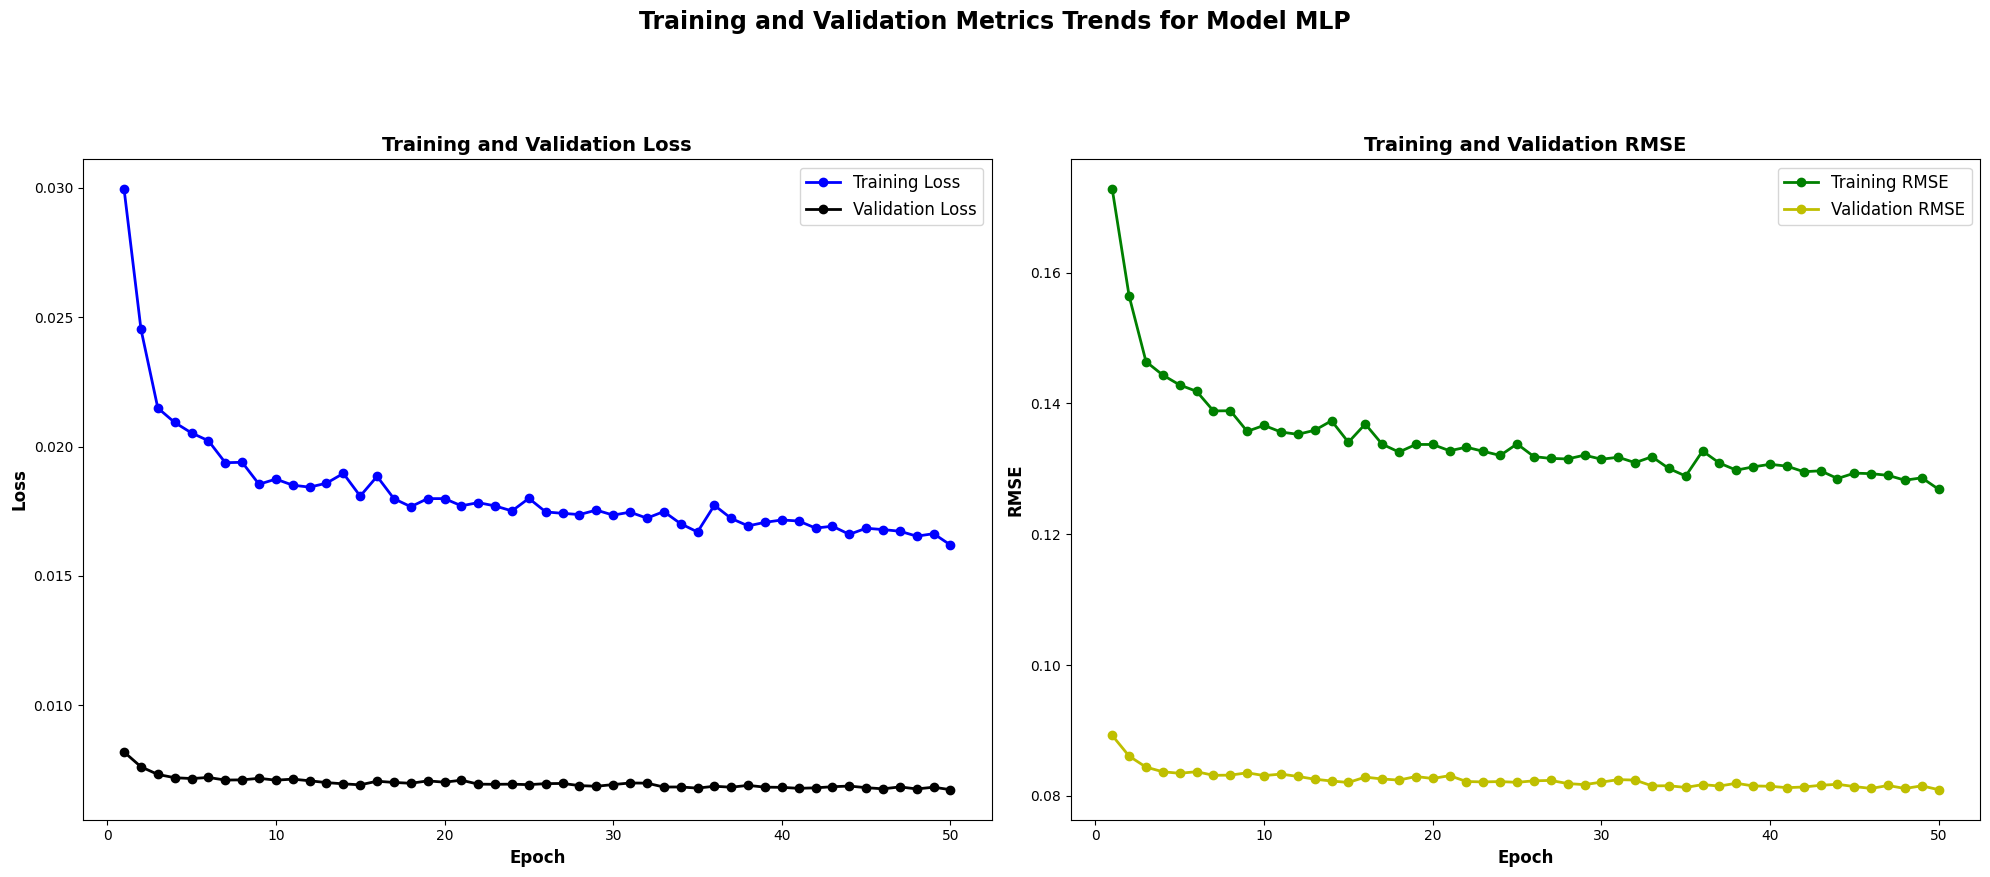

In [ ]:
# plot the training history
training_history_curves_plot(mlp_metrics, "MLP")

In [ ]:
 # get predictions
mlp_predicted_values = predict(trained_mlp_model, X_test)

In [ ]:
mlp_results = pd.DataFrame(
    regression_metrics(y_test.squeeze().cpu().detach().numpy(),mlp_predicted_values),
    index= ["MLP Model"]
)

mlp_results

,R2 Score,Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE)
MLP Model,0.230023,5939.687012,77.069365,60.815434


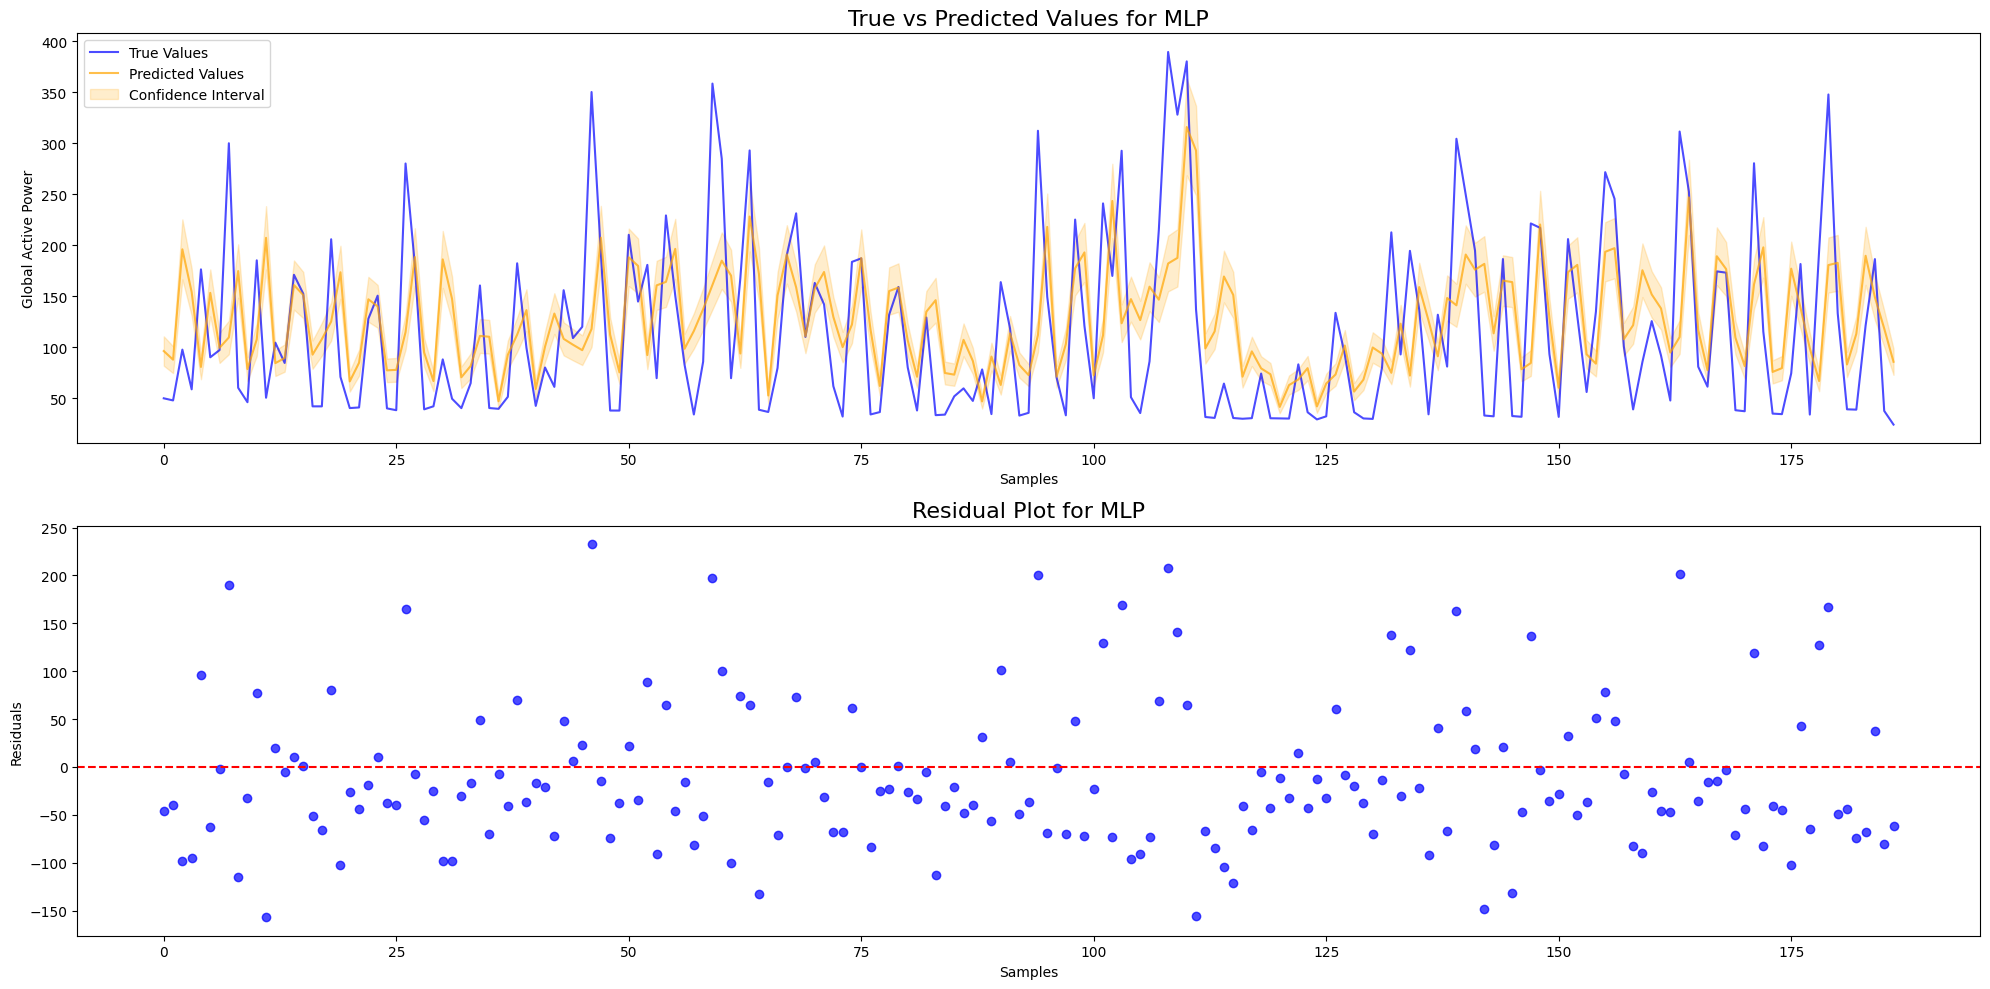

In [ ]:
# predictions comparison for MLP model
compare_predictions_with_ci(y_test.squeeze().cpu().detach().numpy(), mlp_predicted_values, "MLP", ci_width=0.15)

### 2. LSTM model training

In [ ]:
# # using LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size=1, dropout=0.1):
        super(LSTMModel, self).__init__()

        self.lstm1 = nn.LSTM(input_size=input_size,
                             hidden_size=hidden_dim,
                             batch_first=True,
                             dropout=dropout,
                             bidirectional=False)

        self.lstm2 = nn.LSTM(input_size=hidden_dim,
                             hidden_size=hidden_dim,
                             batch_first=True,
                             dropout=dropout,
                             bidirectional=False)

        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        # forward pass through 1st and 2nd LSTM layers
        x, (h_n, c_n) = self.lstm1(x)
        x, (h_n, c_n) = self.lstm2(x)
        # we onlu need to use the last time step or last hidden state as final results
        x = x[:, -1, :]
        # got through a fully connected layer
        x = self.fc(x)
        return x


# create  the model
n_layers =8
drop_prob=0.1
input_dim = Xtrain.shape[2]

lstm_model = LSTMModel(
    input_size=input_dim,
    hidden_dim=HIDDEN_SIZE,
    output_size=output_dim

)

lstm_model.to(DEVICE)

In [ ]:
# train LSTM and evaluate
lstm_criterion = nn.MSELoss(reduction='mean')
lstm_optimizer = torch.optim.Adam(lstm_model.parameters(), lr=LEARNING_RATE)


lstm_trained_model, lstm_metrics = train_and_evaluate(
    lstm_model,
    Xtrain, y_train,
    Xtest, y_test,
    lstm_optimizer, lstm_criterion,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    device=DEVICE
)

In [ ]:
training_history_curves_plot(lstm_metrics, "LSTM")

In [ ]:
lstm_predicted_values = predict(lstm_trained_model, Xtest)
lstm_results = pd.DataFrame(
    regression_metrics(y_test.squeeze().cpu().detach().numpy(),lstm_predicted_values),
    index= ["LSTM Model"]
)

lstm_results

In [ ]:
# predictions comparison for LSTM model
compare_predictions_with_ci(y_test.squeeze().cpu().detach().numpy(), lstm_predicted_values, "LSTM", ci_width=0.15)

### 3. RNN model training

In [ ]:
# RNN

class RNNRegressor(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size=1, n_layers=8, dropout=0.1):
        super(RNNRegressor, self).__init__()

        self.rnn1 = nn.RNN(input_size=input_size,
                           hidden_size=hidden_dim,
                           batch_first=True,
                           #num_layers = n_layers,
                           dropout=dropout,
                           nonlinearity='relu')  # relu to bring non-linearity

        self.rnn2 = nn.RNN(input_size=hidden_dim,
                           hidden_size=hidden_dim,
                           batch_first=True,
                           dropout=dropout,
                           nonlinearity='relu')

        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        # forward pass through 1st and 2nd RNN layers
        x, h_n = self.rnn1(x)
        x, h_n = self.rnn2(x)
        # we only need to use the last time step or last hidden state as final results
        x = x[:, -1, :]
        # pass through a fully connected layer
        x = self.fc(x)
        return x



In [ ]:
# nn.RNN?

In [ ]:
# RNN model
rnn_model = RNNRegressor(input_dim, HIDDEN_SIZE, output_dim, n_layers, drop_prob)
rnn_model.to(DEVICE)

In [ ]:
rnn_criterion = nn.MSELoss(reduction='mean')
rnn_optimizer = torch.optim.Adam(rnn_model.parameters(), lr=LEARNING_RATE)

trained_rnn_model, rnn_metrics = train_and_evaluate(
    rnn_model,
    Xtrain, y_train,
    Xtest, y_test,
    rnn_optimizer, rnn_criterion,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    device=DEVICE
)

In [ ]:
training_history_curves_plot(rnn_metrics, "RNN")

In [ ]:
# get rnn preds
rnn_predicted_values = predict(trained_rnn_model, Xtest)

In [ ]:
rnn_results = pd.DataFrame(
    regression_metrics(y_test.squeeze().cpu().detach().numpy(),rnn_predicted_values),
    index= ["RNN Model"]
)

rnn_results

In [ ]:
# predictions comparison for rnn model
compare_predictions_with_ci(y_test.squeeze().cpu().detach().numpy(), rnn_predicted_values, "RNN", ci_width=0.15)

### 4. GRU model

In [ ]:
# GRU MODEL
class GRURegressor(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size=1, n_layers=1, dropout=0.1):
        super(GRURegressor, self).__init__()

        self.gru1 = nn.GRU(input_size=input_size,
                           hidden_size=hidden_dim,
                           batch_first=True,
                           dropout=dropout,
                           bidirectional=False)

        self.gru2 = nn.GRU(input_size=hidden_dim,
                           hidden_size=hidden_dim,
                           batch_first=True,
                           dropout=dropout,
                           bidirectional=False)

        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        x, h_n = self.gru1(x)
        x, h_n = self.gru2(x)
        x = x[:, -1, :]
        x = self.fc(x)
        return x


In [ ]:
# RNN model
gru_model = GRURegressor(input_dim, HIDDEN_SIZE, output_dim, n_layers, drop_prob)
gru_model.to(DEVICE)

In [ ]:
# train
gru_criterion = nn.MSELoss(reduction='mean')
gru_optimizer = torch.optim.Adam(gru_model.parameters(), lr=LEARNING_RATE)

trained_gru_model, gru_metrics = train_and_evaluate(
    gru_model,
    Xtrain, y_train,
    Xtest, y_test,
    gru_optimizer, gru_criterion,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    device=DEVICE
)

In [ ]:
training_history_curves_plot(gru_metrics, "GRU")

In [ ]:
# predictions
gru_predicted_values = predict(trained_gru_model, Xtest)

In [ ]:
gru_results = pd.DataFrame(
    regression_metrics(y_test.squeeze().cpu().detach().numpy(),gru_predicted_values),
    index= ["GRU Model"]
)

gru_results

In [ ]:
# predictions comparison for gru model
compare_predictions_with_ci(y_test.squeeze().cpu().detach().numpy(), gru_predicted_values, "GRU", ci_width=0.15)

### 5. Hybrid Sequential Model

In [ ]:
# # DO a hybrid of RNN, GRU and LSTM
class HybridSequentialNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers=8, drop_prob=0.2):
        super(HybridSequentialNet, self).__init__()
        # lstm layer
        self.lstm = nn.LSTM(
            input_dim,
            hidden_dim,
            # num_layers = n_layers,
            batch_first=True,
            dropout=drop_prob)
        # gru layer
        self.gru = nn.GRU(
            hidden_dim,
            hidden_dim,
            # num_layers = n_layers,
            batch_first=True,
            dropout=drop_prob)
        # rnn layer
        self.rnn = nn.RNN(
            hidden_dim,
            hidden_dim,
            # num_layers = n_layers,
            batch_first=True,
            dropout=drop_prob)
        # FC layers
        self.fc1 = nn.Linear(hidden_dim, hidden_dim // 2)
        self.fc2 = nn.Linear(hidden_dim // 2, output_dim)
        # drop and ReLU for regularization
        self.dropout = nn.Dropout(drop_prob)
        self.relu = nn.ReLU()

    def forward(self, x):
        # lstm layer
        h0_lstm = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0_lstm = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, (hn_lstm, cn_lstm) = self.lstm(x, (h0_lstm, c0_lstm))
        # gru layer
        h0_gru = torch.zeros(self.gru.num_layers, x.size(0), self.gru.hidden_size).to(x.device)
        out, hn_gru = self.gru(out, h0_gru)
        # rnn layer
        h0_rnn = torch.zeros(self.rnn.num_layers, x.size(0), self.rnn.hidden_size).to(x.device)
        out, hn_rnn = self.rnn(out, h0_rnn)
        # FC layers
        out = self.fc1(out[:, -1, :])
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)

        return out



In [ ]:
hybrid_model = HybridSequentialNet(input_dim, HIDDEN_SIZE, output_dim, n_layers)
hybrid_model.to(DEVICE)

In [ ]:
# train
hybrid_criterion = nn.MSELoss(reduction='mean')
hybrid_optimizer = torch.optim.Adam(hybrid_model.parameters(), lr=LEARNING_RATE)

hybrid_model, hybrid_metrics = train_and_evaluate(
    hybrid_model,
    Xtrain, y_train,
    Xtest, y_test,
    hybrid_optimizer, hybrid_criterion,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    device=DEVICE
)

In [ ]:
training_history_curves_plot(hybrid_metrics, "Hybrid (LSTM, RNN, GRU)")

In [ ]:
# get prediciton for hybrid
hybrid_predicted_values = predict(hybrid_model, Xtest)

In [ ]:
hybrid_results = pd.DataFrame(
    regression_metrics(y_test.squeeze().cpu().detach().numpy(),hybrid_predicted_values),
    index= ["Hybrid Sequential Model"]
)

hybrid_results

In [ ]:
# predictions comparison for hybrid model
compare_predictions_with_ci(y_test.squeeze().cpu().detach().numpy(), hybrid_predicted_values, "HYbrid Sequential", ci_width=0.15)

### Final Comparison

In [ ]:
final_perfomance = pd.concat(
    [lstm_results, rnn_results, gru_results, mlp_results, hybrid_results]
).sort_values(by="R2 Score", ascending=False)

In [ ]:
final_perfomance

In [ ]:
# plotting the comparison
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# R2 Score plot
ax[0, 0].bar(final_perfomance.index, final_perfomance['R2 Score'], color='skyblue')
ax[0, 0].set_title('R2 Score Comparison')
ax[0, 0].set_ylabel('R2 Score')
ax[0, 0].set_xticklabels(final_perfomance.index, rotation=45)

# MSE plot
ax[0, 1].bar(final_perfomance.index, final_perfomance['Mean Squared Error (MSE)'], color='lightcoral')
ax[0, 1].set_title('Mean Squared Error (MSE) Comparison')
ax[0, 1].set_ylabel('MSE')
ax[0, 1].set_xticklabels(df.index, rotation=45)

# RMSE plot
ax[1, 0].bar(final_perfomance.index, final_perfomance['Root Mean Squared Error (RMSE)'], color='lightgreen')
ax[1, 0].set_title('Root Mean Squared Error (RMSE) Comparison')
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].set_xticklabels(final_perfomance.index, rotation=45)

# MAE plot
ax[1, 1].bar(final_perfomance.index, final_perfomance['Mean Absolute Error (MAE)'], color='lightblue')
ax[1, 1].set_title('Mean Absolute Error (MAE) Comparison')
ax[1, 1].set_ylabel('MAE')
ax[1, 1].set_xticklabels(final_perfomance.index, rotation=45)

plt.suptitle("Model's Perfomance Analysis Comparison", fontweight="bold", fontsize=17)

plt.tight_layout()
plt.show()


In [ ]:

# create a list of hyperparameter grid to use
# this are random

import itertools
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
epochs_values = [10, 20, 30, 50, 100, 150]
hidden_dims = [8, 32, 64, 128, 156]


results = []

# iterate over all combinations of hyperparameters
for lr, epochs, hidden_dim in itertools.product(learning_rates, epochs_values, hidden_dims):
    print(f"Training with lr={lr}, epochs={epochs}, hidden_dim={hidden_dim}")

    # def the model with current hyperparameters
    lstm_model = LSTMModel(input_size=input_dim, hidden_dim=hidden_dim, output_size=output_dim)
    lstm_model.to(DEVICE)

    # set up criterion and optimizer
    lstm_criterion = nn.MSELoss(reduction='mean')
    lstm_optimizer = torch.optim.Adam(lstm_model.parameters(), lr=lr)

    # train and evaluate the model
    lstm_trained_model, lstm_metrics = train_and_evaluate(
        lstm_model,
        Xtrain, y_train,
        Xtest, y_test,
        lstm_optimizer, lstm_criterion,
        epochs=epochs,
        batch_size=BATCH_SIZE,
        device=DEVICE,
        log=False
    )

    # pred and calculate regression metrics
    lstm_predicted_values = predict(lstm_trained_model, Xtest)
    metrics = regression_metrics(y_test.squeeze().cpu().detach().numpy(), lstm_predicted_values)

    # save results for this configuration
    result = {
        "learning_rate": lr,
        "epochs": epochs,
        "hidden_dim": hidden_dim,
        "r2_score": metrics["R2 Score"],
        "mse": metrics["Mean Squared Error (MSE)"],
        "rmse": metrics["Root Mean Squared Error (RMSE)"],
        "mae": metrics["Mean Absolute Error (MAE)"]
    }
    results.append(result)


In [ ]:
results_df = pd.DataFrame(results)

results_df.head(10)

In [ ]:
# MSE vs Learning Rate
plt.figure(figsize=(10, 6))
sns.boxplot(x="learning_rate", y="mse", data=results_df)
plt.title("Effect of Learning Rate on MSE")
plt.show()


In [ ]:
# RMSE vs Hidden Dimension Size
plt.figure(figsize=(10, 6))
sns.boxplot(x="hidden_dim", y="rmse", data=results_df)
plt.title("Effect of Hidden Dimension Size on RMSE")
plt.show()


In [ ]:
# MAE vs Epochs
plt.figure(figsize=(10, 6))
sns.boxplot(x="epochs", y="mae", data=results_df)
plt.title("Effect of Epochs on MAE")
plt.show()


In [ ]:
# correlation analysis
corr_matrix = results_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Hyperparameters and Metrics")
plt.show()